---
#   ---                                    *Exploratory Data Analysis (EDA)*   ---
---

## Introduction :
>**Dans ce notebook, nous réalisons une analyse exploratoire complète du dataset afin de :**
> * Comprendre la structure générale des données (dimensions, types, valeurs manquantes),
> * Explorer la distribution statistique des principales variables (moyennes, médianes, écarts-types...),
> * Visualiser les relations entre variables, à la fois quantitatives et qualitatives,
> * Détecter les éventuelles anomalies ou outliers,
> * Poser les premières hypothèses sur les liens potentiels entre les variables cibles et explicatives.
> * Tester la réalité des données synthétiques
> ### L'objectif de cette étape est d'obtenir une vision claire du dataset pour guider les futures phases de pré-traitement et modélisation.

## Bibliothèques Nécessaires

In [ ]:
pip install -r requirements.txt --timeout=100

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import ipywidgets as widgets
from IPython.display import display, clear_output

##  0️⃣ Chargement des Données 

In [239]:
import pandas as pd 
import numpy as np 
df=pd.read_csv('data5.csv')

print(df.columns)





Index(['date', 'city', 'profil_cotier', 'température', 'humidity',
       'vitesse_vent', 'precipitation', 'temp_lag1', 'humid_lag1',
       'vitesse_vent_lag1', 'precip_lag1', 'temp_lag3', 'humid_lag3',
       'vitesse_vent_lag3', 'precip_lag3', 'temp_lag7', 'humid_lag7',
       'vitesse_vent_lag7', 'precip_lag7', 'mois', 'Weekend', 'Jours Fériés',
       'saison', 'Vacances Scolaires', 'Ramadan', 'Nouvel An',
       'Indice de Vague de Chaleur', 'Indice de Vague de Froid ',
       'Indice de Pluie Intense', 'Indice de Tempête', 'Indice de sécheresse',
       'boissons fraiches', 'boissons chaudes', 'snacks sucrés',
       'snacks salés', 'produits laitiers frais', 'produits de jardinage',
       'ustensiles jetables', 'crème solaire', 'équipements d urgence',
       'soins hygiene', 'soins hydratants', 'Charbon',
       'produits anti_moustiques'],
      dtype='object')


# Étape 1️⃣ : Analyse de la structure des données

In [16]:
# Inspectation des 5 premières lignes
df.head()

,date,city,profil_cotier,température,humidity,vitesse_vent,precipitation,temp_lag1,humid_lag1,vitesse_vent_lag1,...,snacks salés,produits laitiers frais,produits de jardinage,ustensiles jetables,crème solaire,équipements d urgence,soins hygiene,soins hydratants,Charbon,produits anti_moustiques
0,2020-02-24,Ariana,Hors côtier,14,53,8,0,14,72,12,...,20,23,3,2,3,5,6,5,10,0
1,2020-02-24,Beja,Intérieure,14,53,8,0,14,72,12,...,17,22,5,0,3,7,6,6,8,0
2,2020-02-24,Ben Arous,Hors côtier,14,53,8,0,14,72,12,...,20,21,3,3,3,6,5,6,8,0
3,2020-02-24,Bizerte,Côtière,14,53,8,0,14,72,12,...,21,23,5,5,4,7,5,5,13,0
4,2020-02-24,Gabès,Intérieure,14,53,8,0,14,72,12,...,20,22,4,0,3,6,6,4,9,0


In [17]:
# Vérification des types de données
print(df.dtypes)

date                          object
city                          object
profil_cotier                 object
température                    int64
humidity                       int64
vitesse_vent                   int64
precipitation                  int64
temp_lag1                      int64
humid_lag1                     int64
vitesse_vent_lag1              int64
precip_lag1                    int64
temp_lag3                      int64
humid_lag3                     int64
vitesse_vent_lag3              int64
precip_lag3                    int64
temp_lag7                      int64
humid_lag7                     int64
vitesse_vent_lag7              int64
precip_lag7                    int64
mois                           int64
Weekend                        int64
Jours Fériés                   int64
saison                        object
Vacances Scolaires             int64
Ramadan                        int64
Nouvel An                      int64
Indice de Vague de Chaleur     int64
I

In [18]:
# Vérification des valeurs manquantes
print(df.isnull().sum())

date                          0
city                          0
profil_cotier                 0
température                   0
humidity                      0
vitesse_vent                  0
precipitation                 0
temp_lag1                     0
humid_lag1                    0
vitesse_vent_lag1             0
precip_lag1                   0
temp_lag3                     0
humid_lag3                    0
vitesse_vent_lag3             0
precip_lag3                   0
temp_lag7                     0
humid_lag7                    0
vitesse_vent_lag7             0
precip_lag7                   0
mois                          0
Weekend                       0
Jours Fériés                  0
saison                        0
Vacances Scolaires            0
Ramadan                       0
Nouvel An                     0
Indice de Vague de Chaleur    0
Indice de Vague de Froid      0
Indice de Pluie Intense       0
Indice de Tempête             0
Indice de sécheresse          0
boissons

In [19]:
# Statistiques descriptives
df.describe().T

,count,mean,std,min,25%,50%,75%,max
température,43769.0,20.789326,6.932130,7.0,15.0,20.0,27.0,38.0
humidity,43769.0,58.761886,10.548656,18.0,52.0,58.0,66.0,91.0
vitesse_vent,43769.0,13.335397,3.815758,6.0,11.0,13.0,15.0,29.0
precipitation,43769.0,9.734013,35.219419,0.0,0.0,0.0,3.0,500.0
temp_lag1,43769.0,20.789006,6.932767,0.0,15.0,20.0,27.0,38.0
humid_lag1,43769.0,58.760241,10.552205,0.0,52.0,58.0,66.0,91.0
vitesse_vent_lag1,43769.0,13.335123,3.816285,0.0,11.0,13.0,15.0,29.0
precip_lag1,43769.0,9.733944,35.219435,0.0,0.0,0.0,3.0,500.0
temp_lag3,43769.0,20.788572,6.933197,0.0,15.0,20.0,27.0,38.0
humid_lag3,43769.0,58.758939,10.554347,0.0,52.0,58.0,66.0,91.0


# Étape 2️⃣ : Distribution des variables numériques

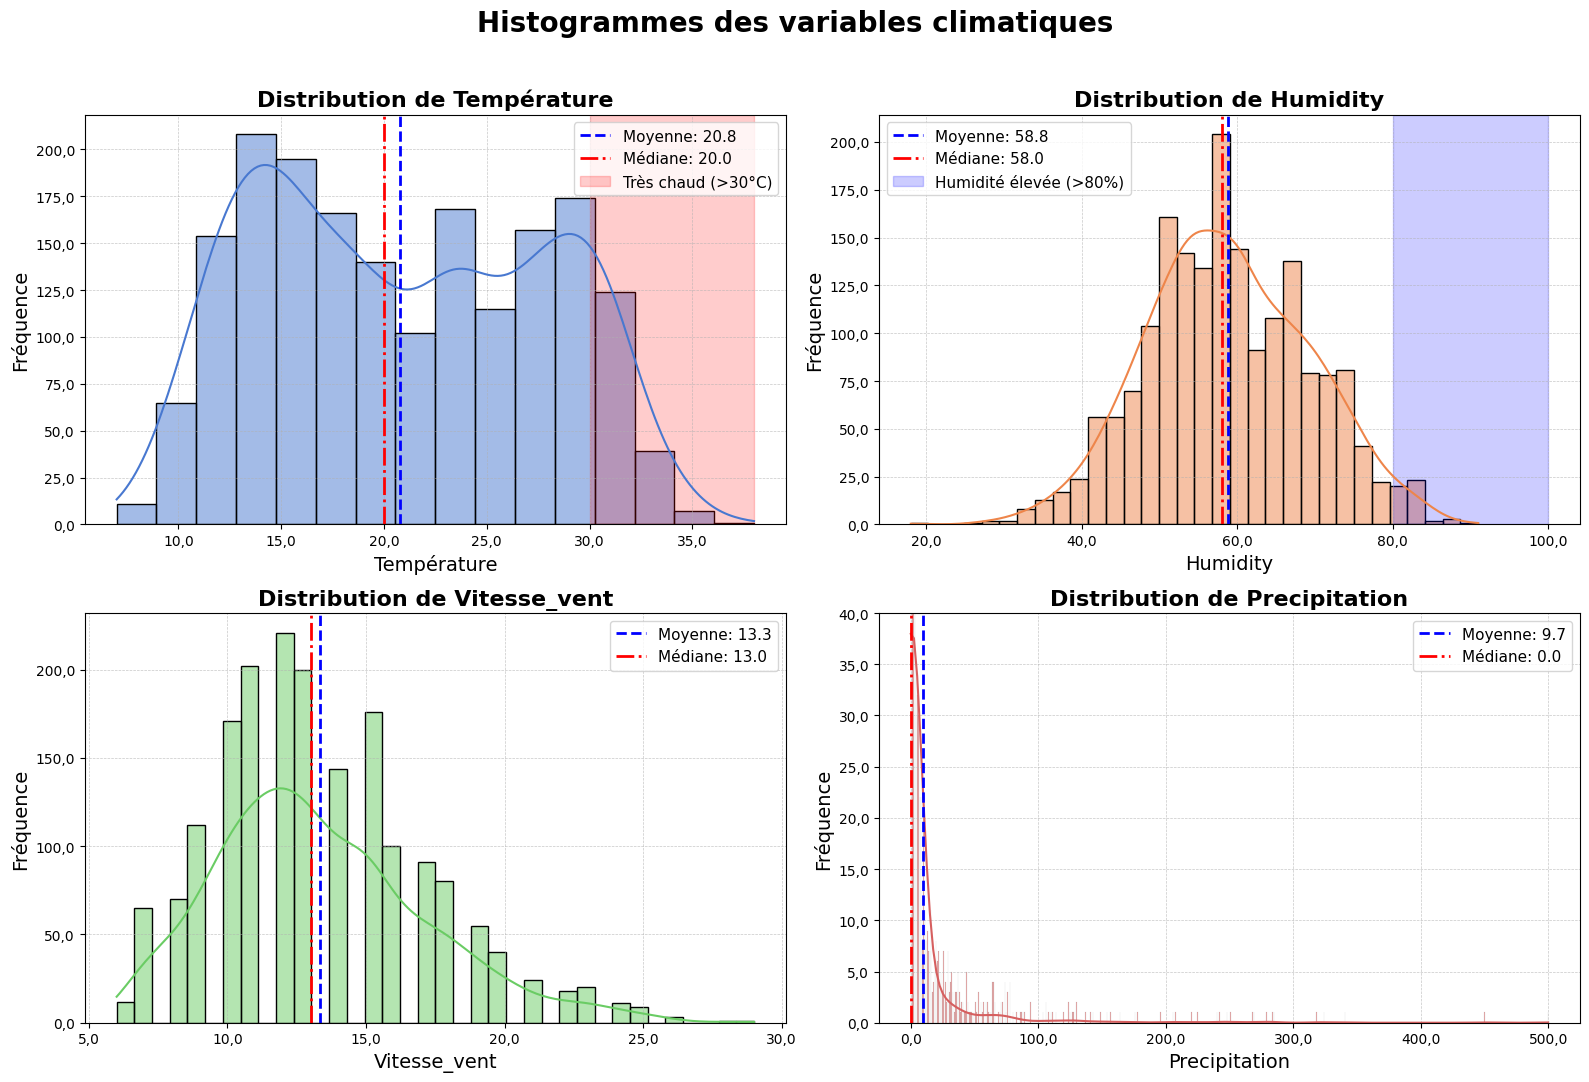

In [6]:
from itertools import cycle
from matplotlib.ticker import FuncFormatter
df_daily= df.groupby('date').agg({'température': 'mean', 'humidity': 'mean','vitesse_vent':'mean','precipitation':'mean'}).reset_index()

# Formatter français (virgules pour les décimales)
def french_format(x, pos):
    return str(x).replace('.', ',')

formatter = FuncFormatter(french_format)
def plot_climate_histograms_v2(df):
    climate_vars = ['température', 'humidity', 'vitesse_vent', 'precipitation']
    sns.set_palette("muted", len(climate_vars)) 
    colors = cycle(sns.color_palette())
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 11))
    axes = axes.flatten()
    
    for i, var in enumerate(climate_vars):
        color = next(colors)
        mean_val = df[var].mean()
        median_val = df[var].median()
        
        # Histogramme + Kernel Density Estimation (KDE)
        sns.histplot(df[var], color=color, kde=True, ax=axes[i], edgecolor='black')
        
        # Lignes pour moyenne et médiane
        axes[i].axvline(mean_val, color='blue', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.1f}')
        axes[i].axvline(median_val, color='red', linestyle='-.', linewidth=2, label=f'Médiane: {median_val:.1f}')
        
        # Marquage des zones extrêmes 
        if var == 'température':
            axes[i].axvspan(30, df[var].max(), color='red', alpha=0.2, label='Très chaud (>30°C)')
        if var == 'humidity':
            axes[i].axvspan(80, 100, color='blue', alpha=0.2, label='Humidité élevée (>80%)')
        
        # Titre, labels et formatage
        axes[i].set_title(f'Distribution de {var.capitalize()}', fontsize=16, weight='bold')
        axes[i].set_xlabel(var.capitalize(), fontsize=14)
        axes[i].set_ylabel('Fréquence', fontsize=14)
        axes[i].yaxis.set_major_formatter(formatter)
        axes[i].xaxis.set_major_formatter(formatter)
        axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
        
        # Cas spécial pour la précipitation
        if var == 'precipitation':
            axes[i].set_ylim(0, 40)
        
        axes[i].legend(fontsize=11)

    plt.suptitle('Histogrammes des variables climatiques', fontsize=20, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('histogrammes_variables_climatiques1.png', dpi=300)
    plt.show()

plot_climate_histograms_v2(df_daily)


## Analyse des Distributions Météorologiques
---

### 1. Température (Distribution de température)
- **Forme** : Distribution multimodale (plusieurs pics) → correspond aux différentes saisons (hiver/été).
- **Intervalle** : Entre environ 8°C et 35°C.
- **Observation** : 
  - Deux pics principaux autour de 15°C et 30°C → températures typiques de printemps/été.


### 2. Humidité (Distribution de humidity)
- **Forme** : Distribution gaussienne (normale) centrée autour de 60%.
- **Intervalle** : De 20% à 90%.
- **Observation** : 
  - Majorité des jours avec humidité modérée → typique des climats ni trop secs ni trop humides.


### 3. Vitesse du vent (Distribution de vitesse_vent)
- **Forme** : Distribution légèrement asymétrique (queue à droite).
- **Intervalle** : De 5 km/h à 30 km/h.
- **Observation** : 
  - Vitesses concentrées entre 8 km/h et 15 km/h.

### 4. Précipitations (Distribution de precipitation)
- **Forme** : Distribution très asymétrique avec beaucoup de zéros (jours sans pluie) et quelques valeurs extrêmes.
- **Intervalle** : De 0 mm à près de 500 mm.
- **Observation** : 
  - Pluies rares, mais certains jours avec précipitations très fortes.


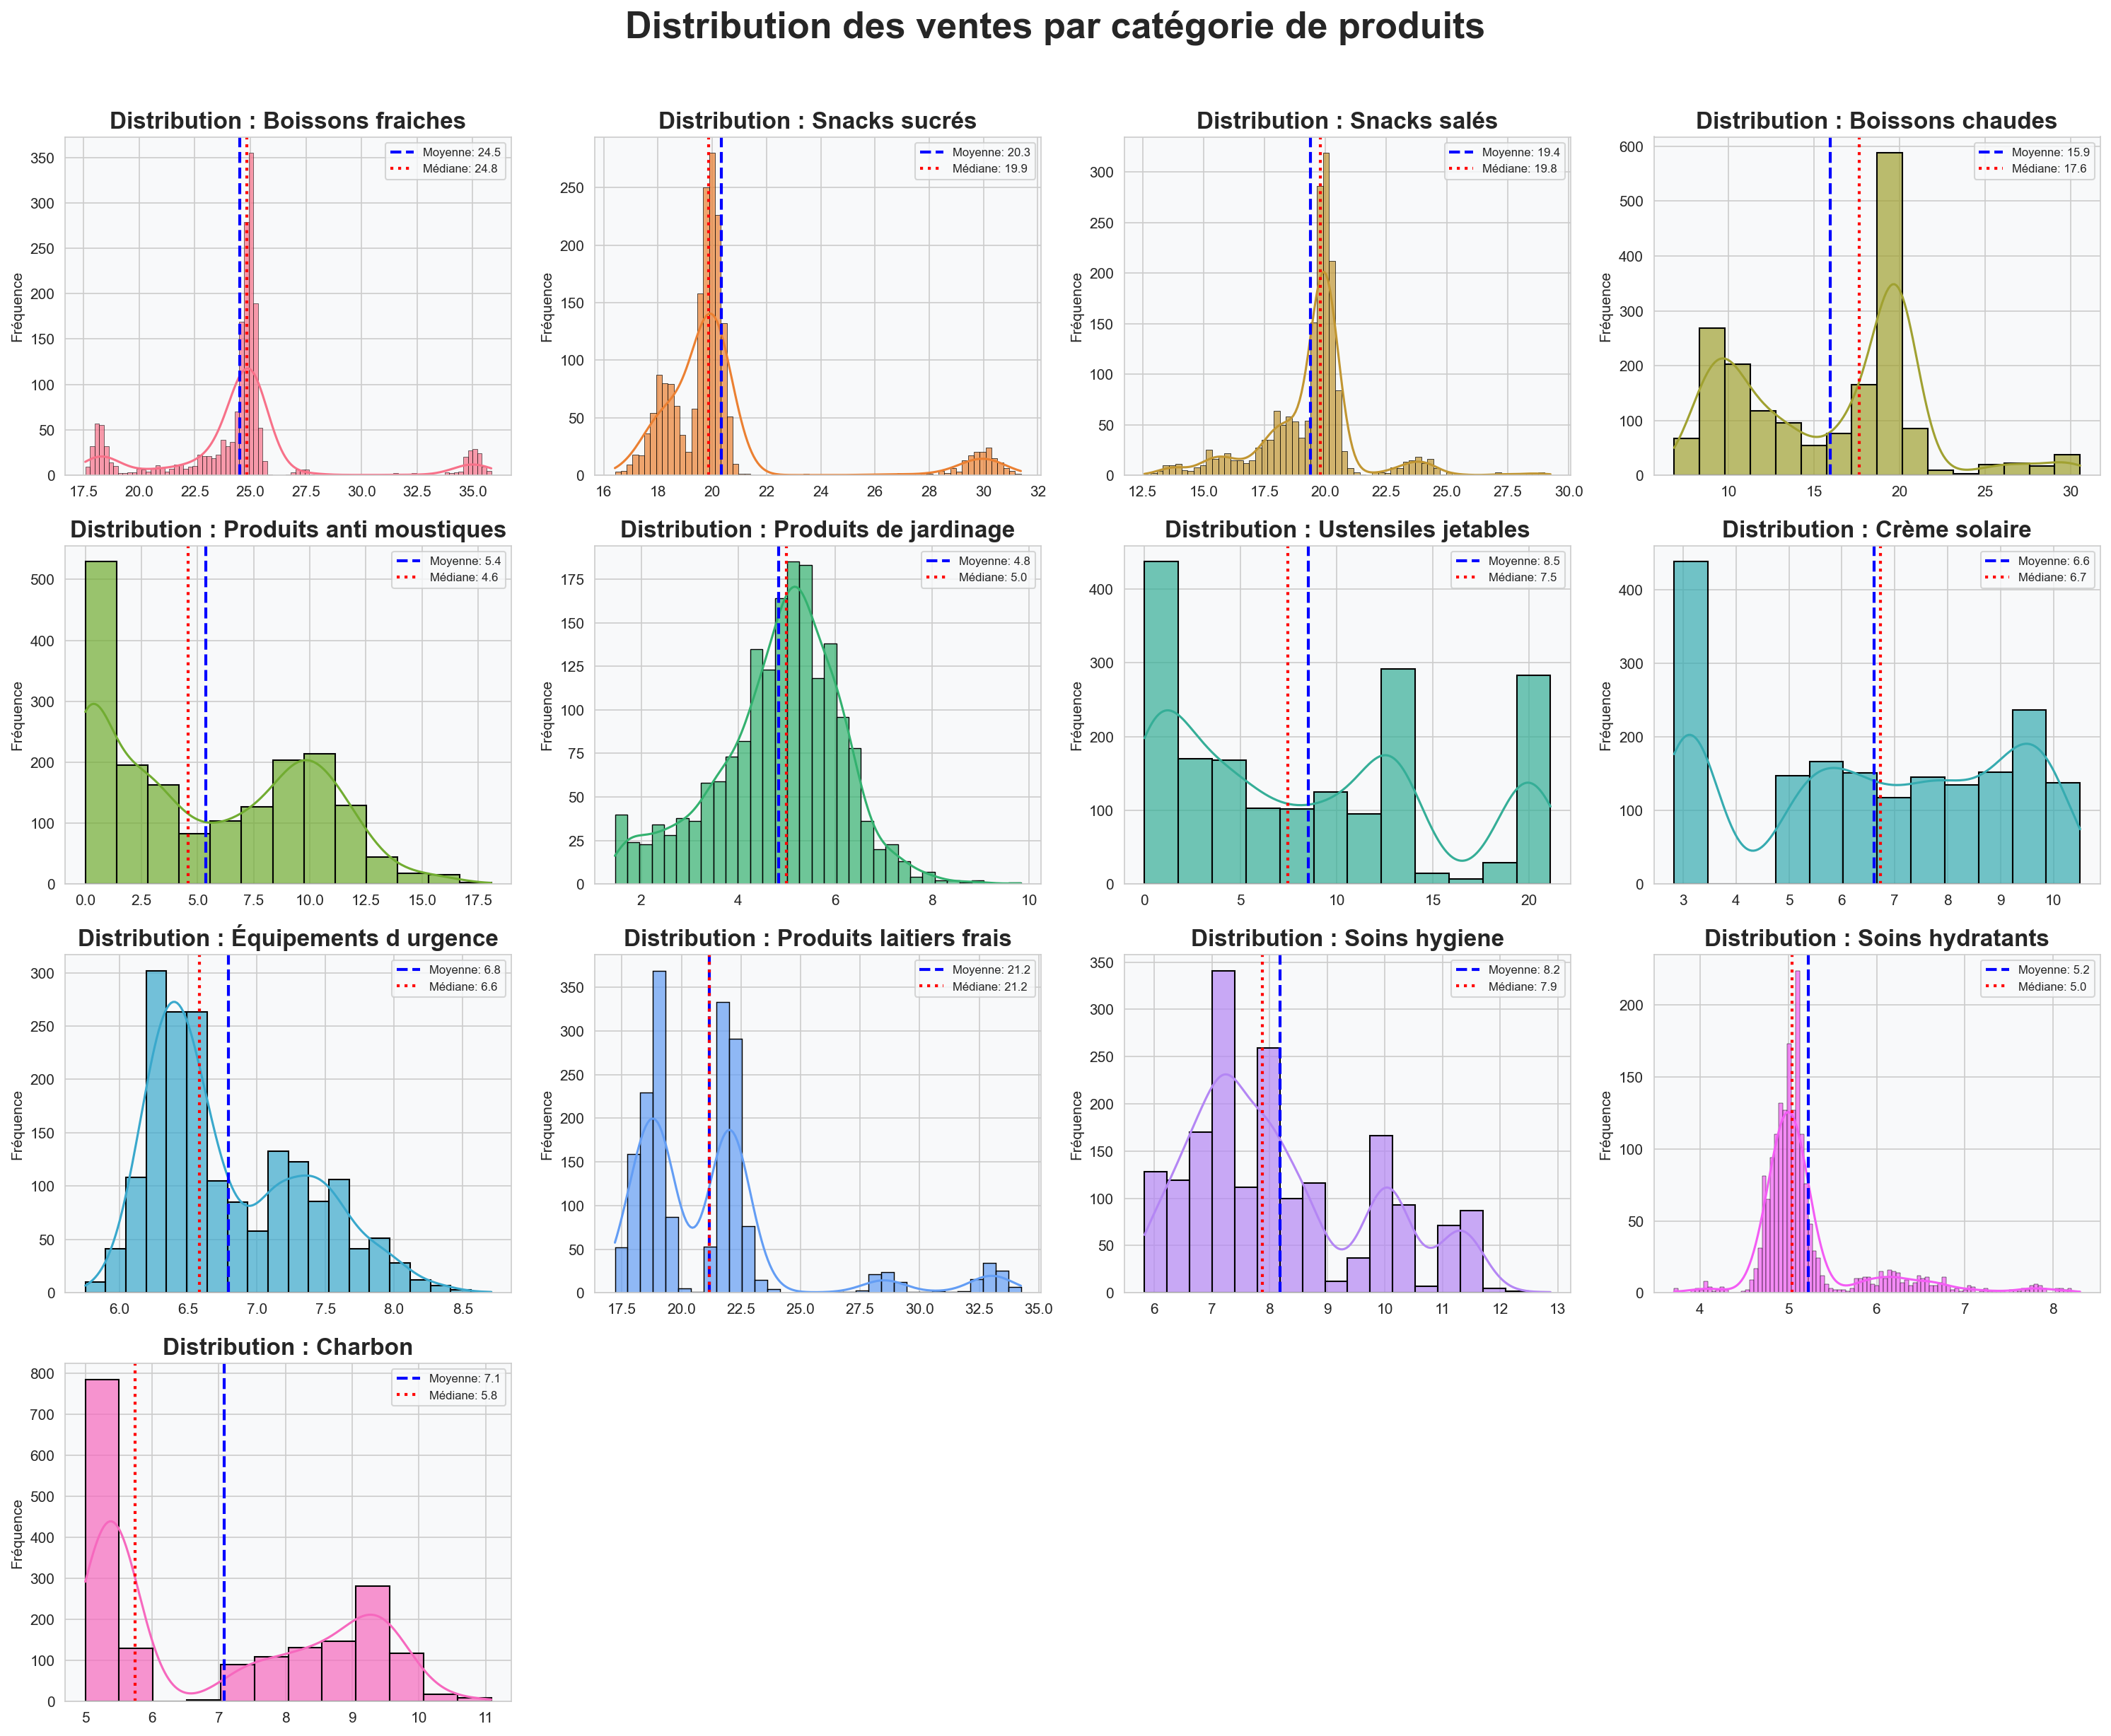

In [9]:

df_daily_ventes = df.groupby('date').agg({ 'boissons fraiches':'mean',
       'snacks sucrés':'mean', 'snacks salés':'mean', 'boissons chaudes':'mean',
       'produits anti_moustiques':'mean', 'produits de jardinage':'mean', 'ustensiles jetables':'mean',
       'crème solaire':'mean', 'équipements d urgence':'mean', 
       'produits laitiers frais':'mean',
       'soins hygiene':'mean', 'soins hydratants':'mean', 'Charbon':'mean'}).reset_index()
def plot_sales_histograms(df) :
    sales_vars = [
        'boissons fraiches', 'snacks sucrés', 'snacks salés', 'boissons chaudes',
        'produits anti_moustiques', 'produits de jardinage', 'ustensiles jetables',
        'crème solaire', 'équipements d urgence', 
        'produits laitiers frais',
        'soins hygiene', 'soins hydratants', 'Charbon'
    ]
    
    # style général
    sns.set_style("whitegrid")
    plt.rcParams['axes.facecolor'] = '#f8f9fa'  # Fond léger
    plt.rcParams['figure.dpi'] = 150

    n_cols = 4
    n_rows = (len(sales_vars) + n_cols - 1) // n_cols
    colors = cycle(sns.color_palette("husl", len(sales_vars)))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    axes = axes.flatten()
    
    for i, var in enumerate(sales_vars):
        if i < len(axes):
            color = next(colors)
            ax = axes[i]
            
            # Histogramme avec KDE
            sns.histplot(df[var], kde=True, color=color, ax=ax, edgecolor='black', alpha=0.7)
            
            # Calcul moyenne et médiane
            mean_val = df[var].mean()
            median_val = df[var].median()
            
            # Tracer moyenne et médiane
            ax.axvline(mean_val, color='blue', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.1f}')
            ax.axvline(median_val, color='red', linestyle=':', linewidth=2, label=f'Médiane: {median_val:.1f}')
            
            # Nettoyer le titre en retirant les underscores
            var_clean = var.replace("_", " ").capitalize()
            ax.set_title(f'Distribution : {var_clean}', fontsize=16, weight='bold')
            
            ax.set_xlabel('', fontsize=10)
            ax.set_ylabel('Fréquence', fontsize=10)
            
            # Afficher la légende pour chaque subplot
            ax.legend(fontsize=8)

    # Cacher les axes vides
    for j in range(len(sales_vars), len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('Distribution des ventes par catégorie de produits', fontsize=25, weight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('histogrammes_ventes2.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_sales_histograms(df_daily_ventes)


## Analyse distribution de ventes
---
### 1. Boissons fraîches
* Distribution multimodale avec un pic principal autour de 24 unités
* Moyenne (24.5) légèrement supérieure à la médiane (24.8), suggérant une légère asymétrie à droite
* Présence de petits pics secondaires vers 17 et 35 unités qui pourraient représenter des achats par lot
  
➡ **on voit clairement un pic autour de 24 unités, ce qui semble normal. Il y a quelques petits pics par-ci par-là qui pourraient être dus à des promos ou des journées particulièrement chaudes.**
### 2. Snacks 
➡ **Les snacks (sucrés et salés) suivent à peu près le même pattern, avec une concentration principale entre 18-22. C'est logique, les gens achètent souvent ces deux types de produits ensemble.**
### 4. Boissons chaudes

* Distribution bimodale très marquée avec pics à 10-11 ,20et 30-32 unités
* Forte asymétrie suggérant deux comportements d'achat distincts
* L'écart important entre moyenne (15.9) et médiane (17.6) confirme cette distribution non-uniforme
  
➡**Très réaliste pour des boissons chaudes qui peuvent avoir des ventes saisonnières marquées**
## 5. Produits anti-moustiques

* Distribution bimodale avec concentration aux valeurs basses (0-5) et pic secondaire vers 12-13
  
➡ **On voit bien que soit personne n'en achète (le pic vers 0-5), soit tout le monde se rue dessus quand il fait chaud et humide (le pic vers 12). Typiquement le genre de produit qui doit exploser quand la météo s'y prête.**
## 6. Produits de jardinage

* Distribution en forme de cloche légèrement asymétrique 
  
➡ **Ça semble cohérent pour un produit assez stable mais quand même influencé par la météo.**
## 7. Ustensiles jetables

* Distribution multimodale très irrégulière avec plusieurs pics (0-5, 10, 15, 20)
  
➡  **c'est super irrégulier avec plein de pics. Peut-être que ça correspond aux weekends ou aux jours fériés? C'est le genre de truc qu'on achète pour des barbecues ou des pique-niques.**
## 8. Crème solaire

* Distribution multimodale 
* Présence de plusieurs pics implique différents formats ou occasions d'achat
  
➡ **Réaliste pour un produit saisonnier avec forte dépendance météorologique**
## 9. Équipement d'urgence
➡ **Est concentré vers le bas (6-8 unités), ce qui semble logique - c'est pas le genre de truc qu'on achète en masse sauf en cas d'alerte météo.**
## 10. Produits laitiers frais

* Distribution multimodale avec pics à 20, 22 et 24 unités
  
➡ Probablement parce que c'est un achat de base mais qui varie selon les habitudes des gens.
## 11. Soins 
* Pour les produits d'hygiène et hydratants, on voit des patterns différents mais cohérents avec leur usage - les hydratants sont très concentrés autour d'une valeur (5) alors que les produits d'hygiène varient plus.

➡ **Distribution cohérente pour des produits d'usage quotidien**
## 13. Charbon

* Distribution bimodale avec un pic principal à 5-6 unités et secondaire vers 9-10 unités
  
➡ **Très réaliste pour un produit saisonnier fortement lié aux conditions météorologiques**
  

# Étape 3️⃣ : Analyse des corrélations

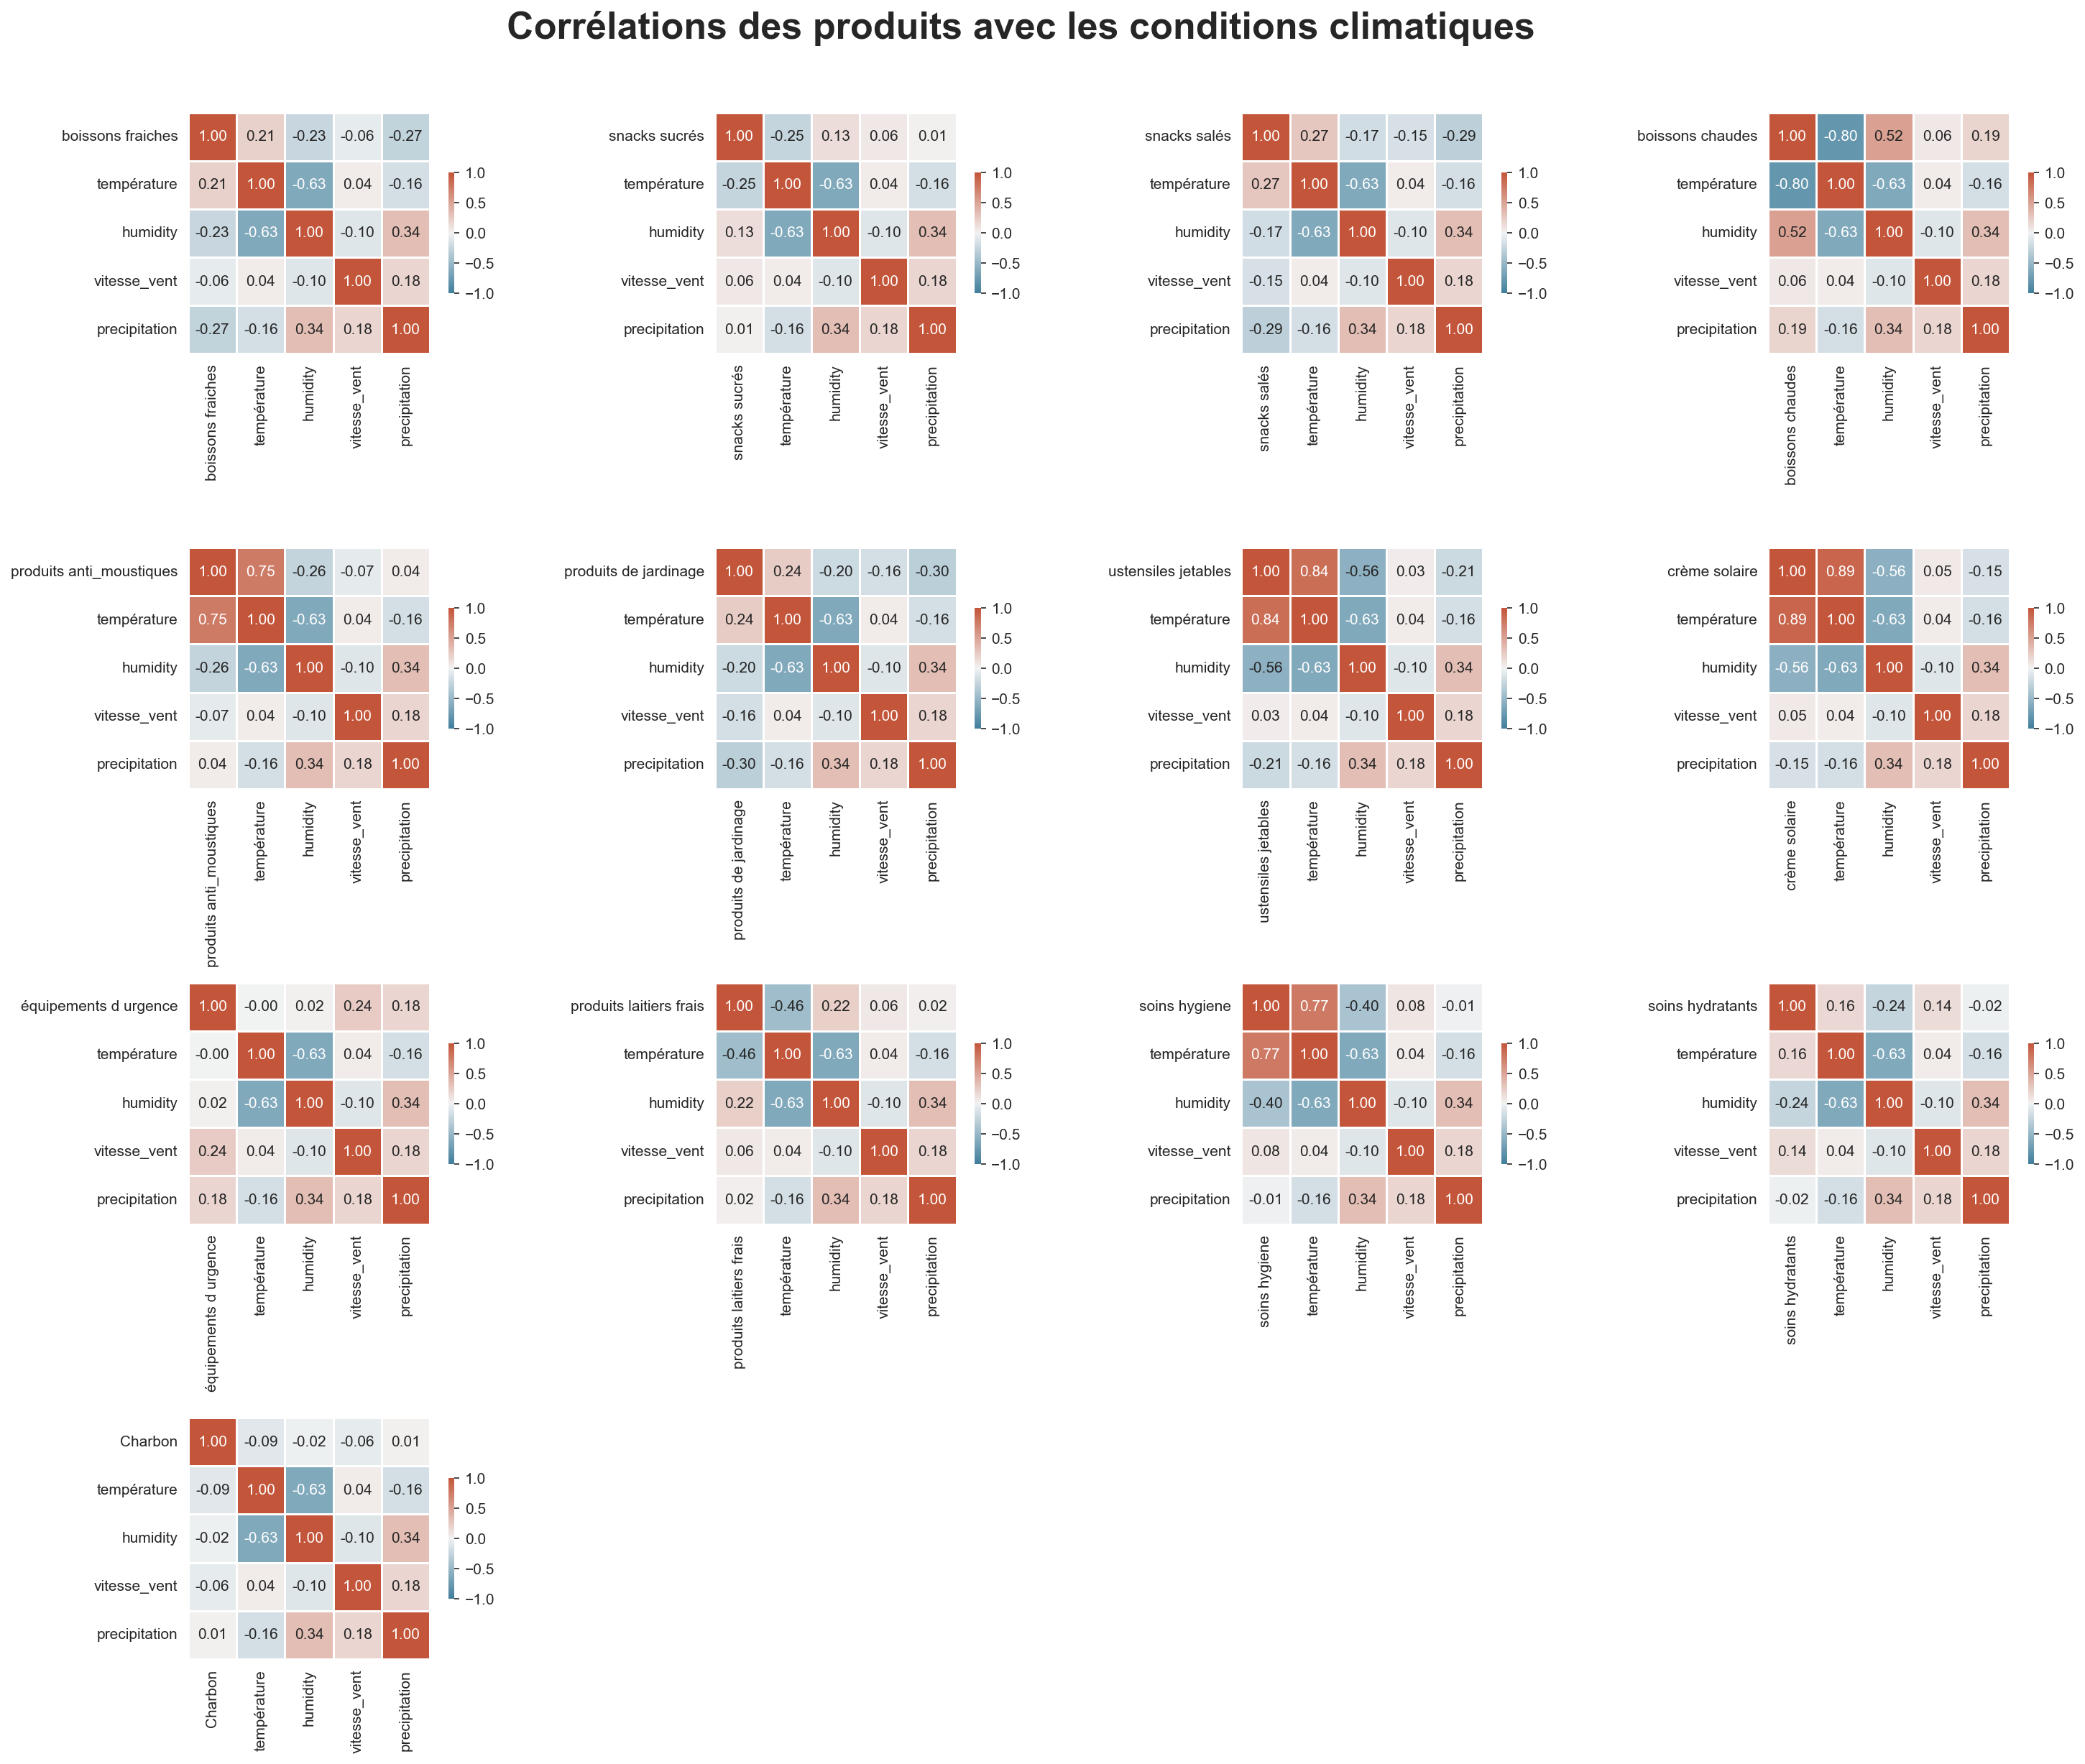

In [11]:
colonnes_climat = ['température', 'humidity', 'vitesse_vent', 'precipitation']
colonnes_produits = ['boissons fraiches','snacks sucrés', 'snacks salés','boissons chaudes','produits anti_moustiques', 'produits de jardinage', 
                     'ustensiles jetables','crème solaire', 'équipements d urgence', 
                     'produits laitiers frais' ,'soins hygiene', 'soins hydratants', 'Charbon'] 
n_cols = 4
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()
for i in range(len(colonnes_produits), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])
    
cmap = sns.diverging_palette(230, 20, as_cmap=True)

for i, produit in enumerate(colonnes_produits):
    row = i // n_cols
    col = i % n_cols
    # Sélectionner les colonnes pertinentes pour ce produit
    colonnes_corr = [produit] + colonnes_climat
    df_corr = df[colonnes_corr]
    
    # Calculer la matrice de corrélation
    matrice_corr = df_corr.corr()
    
    # Tracer la heatmap dans le sous-graphique correspondant
    ax = axes[i] if len(colonnes_produits) > 1 else axes
    sns.heatmap(matrice_corr,  
                cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
                annot=True, fmt=".2f", ax=ax)
    
    
plt.suptitle('Corrélations des produits avec les conditions climatiques',fontsize=25, weight='bold', y=1.02)
plt.tight_layout()
plt.savefig('Corrélations.png', dpi=300)
plt.show()

##  **Est-ce que ces corrélations sont logiques et réalistes ? 🤔**

### 1. Produits laitiers frais 
- **Température** : légère corrélation positive ➔ **LOGIQUE**  
  > Quand il fait chaud, on préfère des aliments frais, plus légers, comme les yaourts ou le lait.  
   

- **Humidité** : corrélation positive faible ➔ **PLAUSIBLE**  
  > Quand il fait lourd (chaud + humide), les gens évitent les repas lourds, donc privilégient aussi les produits laitiers frais.  


### 2. Snacks sucrés 
- **Température** : corrélation positive ➔ **LOGIQUE **  
  > En été, il y a plus de sorties, d’événements, les gens prennent des snacks plus souvent (barres énergétiques, sucreries rapides).  
  > *Aussi, la chaleur donne envie d'aliments sucrés rapides, parfois glacés (glaces, friandises froides).*  

- **Humidité, vent, pluie** ➔ corrélations faibles ➔ **Aucun problème**  

### 3. Snacks salés 
- **Température** : corrélation positive ➔ **LOGIQUE**  
  > Plus d'activités extérieures ➔ apéritifs, chips, sandwichs rapides.  

- **Précipitation** : corrélation négative (-0.29) ➔ **TRÈS LOGIQUE**  
  > Quand il pleut, moins de pique-niques, de fêtes, de barbecues ➔ moins besoin de snacks salés.  

- **Humidité et vent** : corrélations négatives légères ➔ **Aussi plausible.**  



### 4. Boissons fraîches  
- **Température** : forte corrélation positive (0.7 ou plus) ➔ **TRÈS LOGIQUE**  
  > Plus il fait chaud, plus on consomme de boissons fraîches.  

- **Précipitation** : légère corrélation négative ➔ **LOGIQUE**  
  > Quand il pleut, les gens sortent moins, donc achètent moins.  


### 5. Boissons chaudes  
- **Température** : corrélation négative ➔ **LOGIQUE**  
  > Quand il fait froid, on consomme plus de boissons chaudes.  

- **Humidité, pluie** : effets faibles ➔ **Acceptable.**  


### 6. Soins solaires  
- **Température** : corrélation positive ➔ **LOGIQUE**  
  > Plus il fait chaud/ensoleillé ➔ plus on utilise de crème solaire.  

- **Précipitation** : corrélation négative ➔ **ÉVIDENT**  
  > Moins de soleil = moins besoin.  


### 7. Produits anti-moustiques  
- **Température et humidité** : corrélation positive ➔ **TRÈS LOGIQUE**  
  > Moustiques aiment chaleur + humidité ➔ ventes augmentent.  



### 8. Produits de jardinage  
- **Température** : corrélation positive ➔ **LOGIQUE**  
  > Le jardinage se fait surtout au printemps-été.  

- **Précipitation** : effet négatif faible ➔ **Normal.**  



###  9. Ustensiles jetables  
- **Température** : corrélation positive ➔ **LOGIQUE**  
  > Plus de pique-niques, barbecues en été ➔ plus besoin d'ustensiles jetables.  



### 10. Soins d’hygiène et soins hydratants  
- **Température positive pour soins hydratants** ➔ **Logique** (peau sèche l'été aussi).  
- **Pas d'effet fort pour hygiène** ➔ **Normal** (achats réguliers toute l'année).  


### 11. Équipements d’urgence  
- **Corrélations positive modérée avec la precipitation et vitesse de vent** ➔ **LOGIQUE**  
  > Ces produits sont achetés pour la sécurité (copure de courant cousé par forte pluie ou vent)   



### 12. Charbon  
- **Température** : corrélation positive ➔ **LOGIQUE**  
  > Barbecues d'été = plus de charbon utilisé.  

##  Conclusion  
>**Tous les produits montrent des corrélations logiques et réalistes**, conformes aux comportements humains face aux variations météo !  

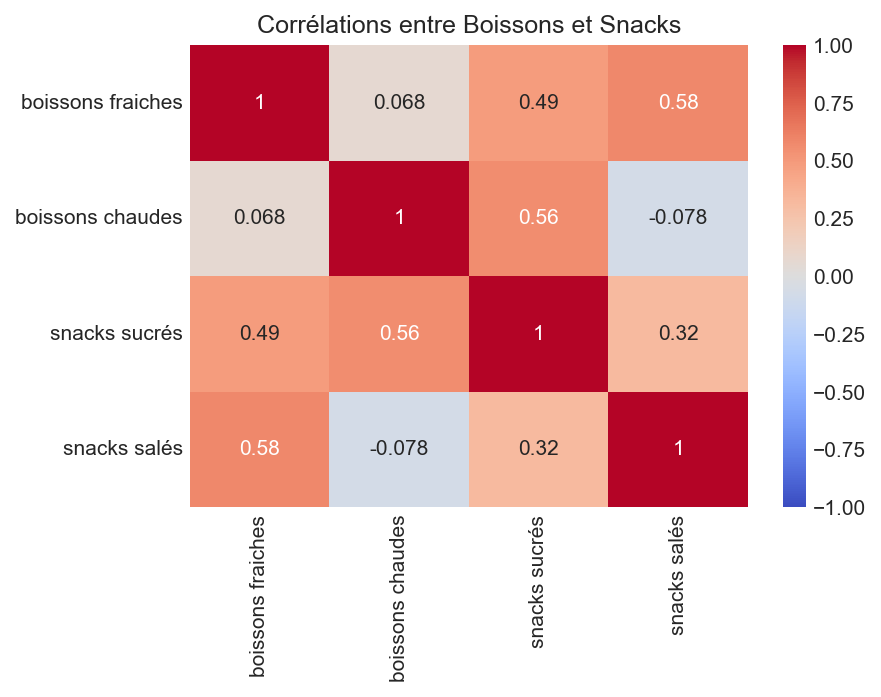

In [275]:
''' Corrélations entre Boissons et Snacks '''
#------------------------------------------------------------------
boissons = ['boissons fraiches', 'boissons chaudes']
snacks = ['snacks sucrés', 'snacks salés']


boissons_snacks_df = df[boissons + snacks]

# matrice de corrélation
correlation_matrix = boissons_snacks_df.corr()

# Visualisation :
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Corrélations entre Boissons et Snacks")
plt.savefig("corr_b_s1.png")

plt.show()


## **Relations fortes et significatives**

### **Boissons fraîches et snacks salés (0.58)** 
➡ Cette corrélation modérément forte peut s'expliquer par:

* **Le mécanisme physiologique de la soif induite par le sel:** les aliments salés augmentent la sensation de soif
* **Association comportementale:** les snacks salés comme les chips sont souvent consommés avec des boissons rafraîchissantes
> **Contexte de consommation commun: événements sociaux, visionnage de films, repas décontractés**

---
### **Boissons chaudes et snacks sucrés (0.56)** 
 Cette relation s'explique par:

* le sucré complimente bien les saveurs amères du café/thé
* **Habitudes culturelles:** le Duo café/thé accompagné de pâtisseries ou biscuits
* Effet de la caféine qui peut stimuler l'appétit pour le sucre via des mécanismes hormonaux
---
### **Boissons fraîches et snacks sucrés (0.49)**
 Association modérée due à:

* Facteur psychologique: recherche de sensations agréables simultanées
* Marketing: positionnement comme produits de plaisir/réconfort
* Composition similaire: forte teneur en sucre dans les deux catégories

---
## Relations faibles ou négatives

### **Boissons chaudes et snacks salés (-0.078)**
 Légère corrélation négative implique:

* Incompatibilité gustative: l'amertume des boissons chaudes ne se marie pas bien avec le salé
* Différence contextuelle: les boissons chaudes sont souvent consommées dans un cadre différent des snacks salés
## **Conclusion** :  
**TRÈS RÉALISTE** - Les corrélations générées correspondent parfaitement :
1. Aux mécanismes physiologiques connus
2. Aux comportements consommateurs logiques
3. Aux principes de neuro-gastronomie
   


# Étape 4️⃣ : Analyse des effets saisonniers et des événements

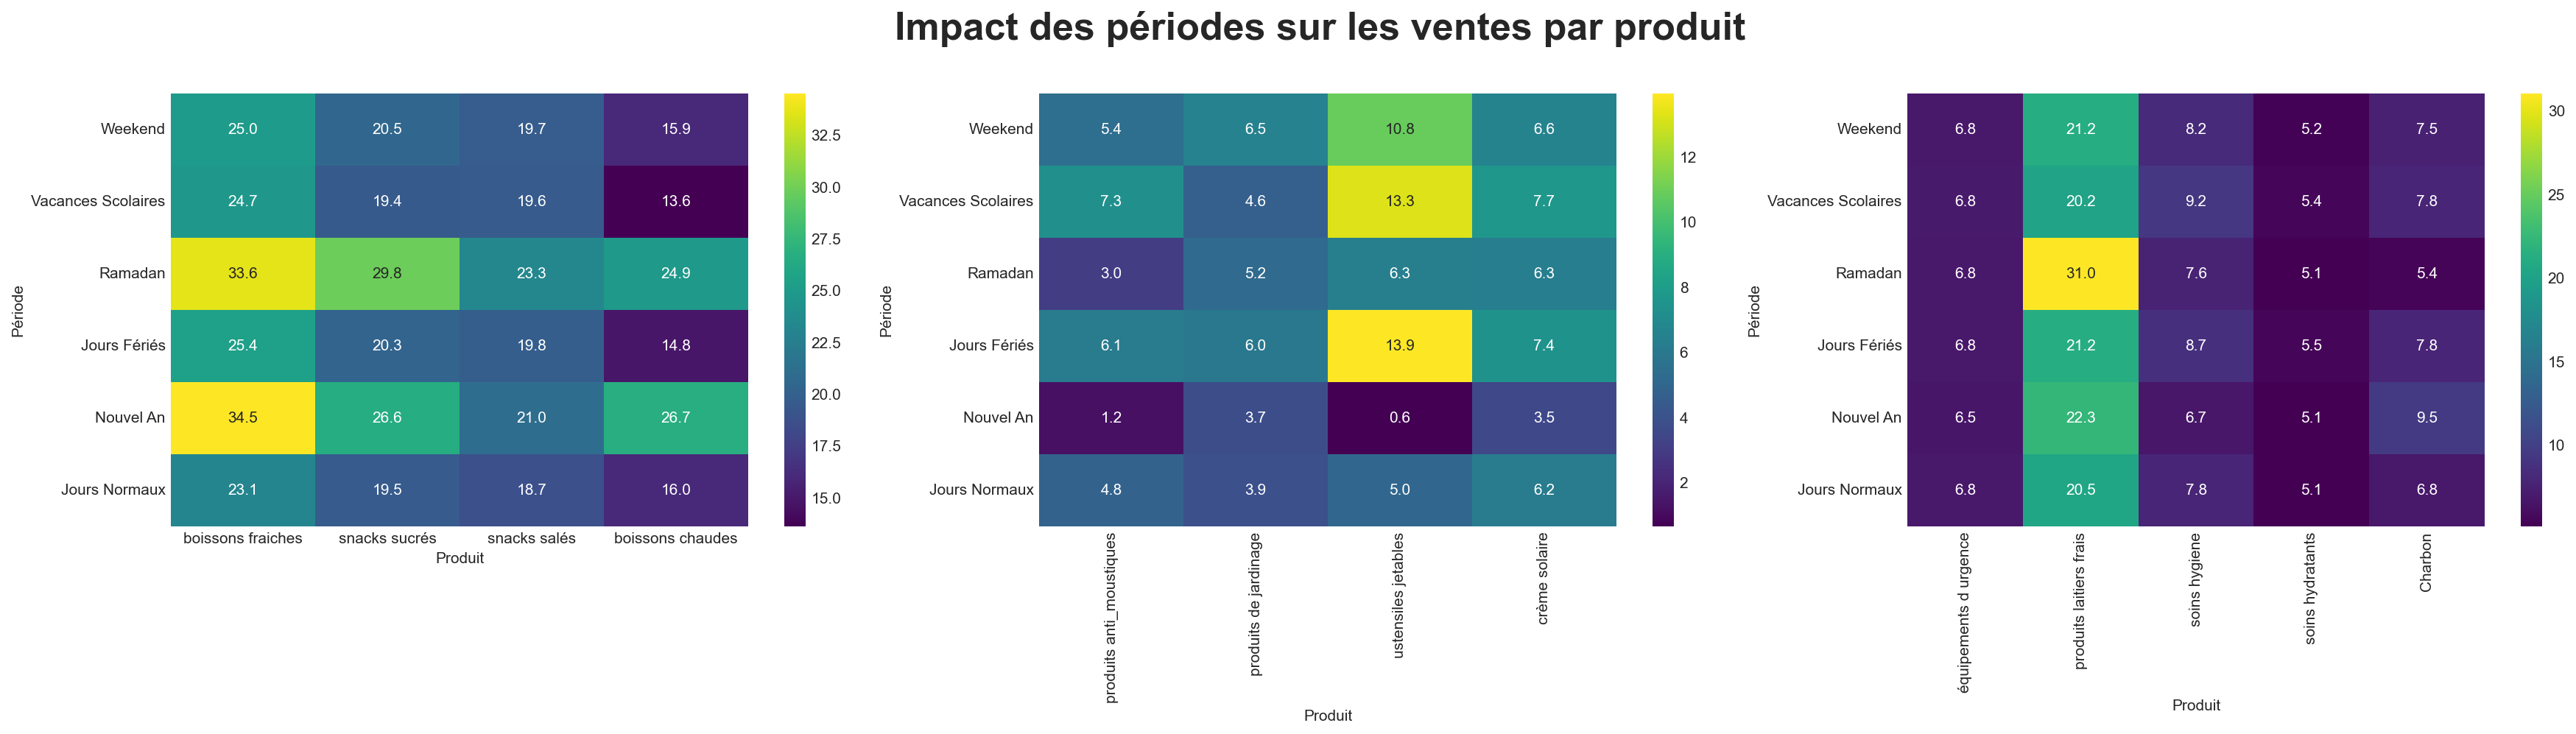

In [206]:
colonnes_produits = ['boissons fraiches','snacks sucrés', 'snacks salés','boissons chaudes','produits anti_moustiques', 'produits de jardinage', 
                     'ustensiles jetables','crème solaire', 'équipements d urgence', 
                     'produits laitiers frais' ,'soins hygiene', 'soins hydratants', 'Charbon']
'''1. Analyse comparative des ventes par période'''

#palette de couleurs
def get_color_palette(n_colors):
    return sns.color_palette("viridis", n_colors)
# Liste des périodes à analyser
periods = ['Weekend', 'Vacances Scolaires', 'Ramadan', 'Jours Fériés', 'Nouvel An']
period_names = ['Weekend', 'Vacances Scolaires', 'Ramadan', 'Jours Fériés', 'Nouvel An', 'Jours Normaux']
#-----------------------------------------------------------------------------------------------------------

'''1.1 Moyenne des ventes par produit et par période'''

# stocke des moyennes par période
sales_avg_by_period = pd.DataFrame()

for product in colonnes_produits:
    for period in periods:
        period_name = period.replace('_', ' ').title()
        # Calcul de la moyenne des ventes pour la période
        moyenne = df.loc[df[period] == 1, product].mean()
        # Ajout au DataFrame
        sales_avg_by_period.loc[period_name, product] = moyenne

    # Jours normaux
    normal_days = df[
        (df['Weekend'] == 0) & 
        (df['Vacances Scolaires'] == 0) & 
        (df['Jours Fériés'] == 0) & 
        (df['Ramadan'] == 0) & 
        (df['Nouvel An'] == 0)
    ]
    sales_avg_by_period.loc['Jours Normaux', product] = normal_days[product].mean()

# 1.2 Visualisation comparative des ventes moyennes par période pour les produits 
# Diviser les produits en 2 groupes de 4 et 1 groupe de 5
product_groups = []
product_groups.append(colonnes_produits[:4])  # Premier groupe de 4
product_groups.append(colonnes_produits[4:8])  # Deuxième groupe de 4
product_groups.append(colonnes_produits[8:])   # Groupe restant de 5

# lignes et colonnes pour la grille
ncols = 3
nrows = 1


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8 * ncols, 6 * nrows))

# Afficher chaque groupe dans une heatmap
for idx, group in enumerate(product_groups):
    ax = axes[idx]  
    sns.heatmap(sales_avg_by_period[group], annot=True, fmt='.1f', cmap='viridis', ax=ax)
    
    ax.set_ylabel('Période')
    ax.set_xlabel('Produit',y=1.1)


plt.tight_layout()
plt.suptitle('Impact des périodes sur les ventes par produit', fontsize=25,weight='bold', y=1.1)
plt.savefig('period_impact2.png', dpi=300)
plt.show()



##  1. Boissons & Snacks 
###  Ramadan
- **Boissons fraîches**: +29.6%
- **Snacks sucrés**: +29.8%
- **Boissons chaudes**: +39.8%
➔ **Logique**: Pic de consommation lors de l'iftar (rupture du jeûne)

###  Nouvel An
- **Boissons fraîches**: +30.0%
- **Snacks sucrés**: +26.6%
➔  **Logique**: Célébrations et fêtes

###  Weekends/Jours Fériés
- Légère augmentation
➔  **Logique**: Sorties et moments conviviaux

---

##  2. Produits Extérieurs 
###  Vacances Scolaires
- **Jardinage**: +13.3%
- **Ustensiles jetables**: +13.3%
➔  **Logique**: Activités de plein air

###  Jours Fériés
- **Jardinage**: +9.5%
- **Ustensiles jetables**: +13.9%
➔  **Logique**: Barbecues et pique-niques

###  Ramadan
- Baisse générale sauf jardinage léger
➔  **Logique**: Moins d'activités extérieures

###  Nouvel An
- Faible consommation
➔  **Logique**: Priorité aux produits alimentaires

---

##  3. Produits Spéciaux 
###  Ramadan
- **Produits laitiers frais**: +31.0%
➔  **Logique**: Essentiels pour iftar/shour

###  Nouvel An
- **Charbon**: +9.5%
➔  **Logique**: Barbecues de fête

###  Weekends/Jours Fériés
- **Charbon**: Légère hausse
➔  **Logique**: Repas en extérieur

---

## 4. Soins d'hygiène et hydratants :
- Niveaux stables
➔  **Logique**: Produits du quotidien

---

# Synthèse :
 > **Toutes les tendances montrent une excellente cohérence entre les données et les comportements consommateurs attendus pour chaque période et catégorie de produits.**

# Étape 6️⃣ :  **Analyse comparative**

C:\Users\salma souissi\AppData\Local\Temp\ipykernel_11216\1237280410.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024[produit + '_smooth'] = df_2024[produit].rolling(window=7, center=True, min_periods=1).mean()
C:\Users\salma souissi\AppData\Local\Temp\ipykernel_11216\1237280410.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024[produit + '_smooth'] = df_2024[produit].rolling(window=7, center=True, min_periods=1).mean()


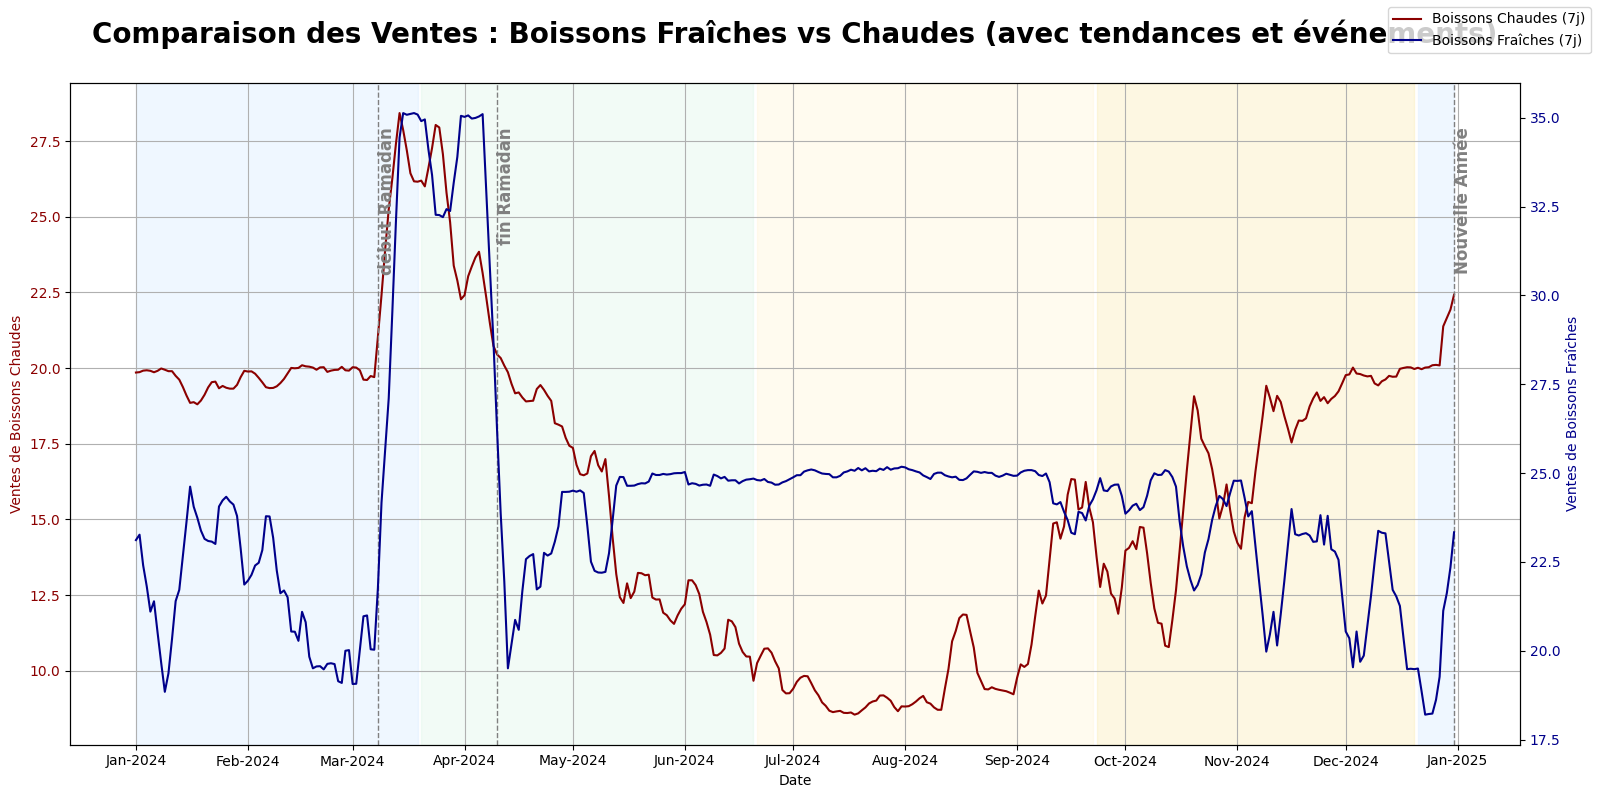

In [8]:

import matplotlib.dates as mdates
df_daily_ventes = df.groupby('date').agg({ 'boissons fraiches':'mean',
       'snacks sucrés':'mean', 'snacks salés':'mean', 'boissons chaudes':'mean',
       'produits anti_moustiques':'mean', 'produits de jardinage':'mean', 'ustensiles jetables':'mean',
       'crème solaire':'mean', 'équipement d urgence':'mean', 
       'produits laitiers frais':'mean',
       'soins hygiene':'mean', 'soins hydratants':'mean', 'Charbon':'mean'}).reset_index()


df_daily_ventes['date'] = pd.to_datetime(df_daily_ventes['date'])
df_2024 = df_daily_ventes[df_daily_ventes['date'].dt.year == 2024]


produits_a_comparer = ['boissons fraiches', 'boissons chaudes']
couleurs = {
    'boissons fraiches': 'darkblue',
    'boissons chaudes': 'darkred'
}

#  Moyenne mobile (rolling 7 jours)
for produit in produits_a_comparer:
    df_2024[produit + '_smooth'] = df_2024[produit].rolling(window=7, center=True, min_periods=1).mean()

fig, ax1 = plt.subplots(figsize=(16, 8))

# Colorier les saisons
seasons = {
    'Winter': ('2024-01-01', '2024-03-19'),
    'Spring': ('2024-03-20', '2024-06-20'),
    'Summer': ('2024-06-21', '2024-09-22'),
    'Autumn': ('2024-09-23', '2024-12-20'),
    'Winter_end': ('2024-12-21', '2024-12-31')
}
season_colors = {
    'Winter': '#cce5ff', 
    'Spring': '#d5f5e3', 
    'Summer': '#fff3cd', 
    'Autumn': '#f9e79f',
    'Winter_end': '#cce5ff'
}
for season, (start, end) in seasons.items():
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=season_colors[season], alpha=0.3)


ax2 = ax1.twinx()
ax1.plot(df_2024['date'], df_2024['boissons chaudes_smooth'], label='Boissons Chaudes (7j)', color=couleurs['boissons chaudes'])
ax2.plot(df_2024['date'], df_2024['boissons fraiches_smooth'], label='Boissons Fraîches (7j)', color=couleurs['boissons fraiches'])

# 7. Formatage des axes
ax1.set_ylabel('Ventes de Boissons Chaudes', color=couleurs['boissons chaudes'])
ax2.set_ylabel('Ventes de Boissons Fraîches', color=couleurs['boissons fraiches'])
ax1.set_xlabel('Date')

ax1.tick_params(axis='y', labelcolor=couleurs['boissons chaudes'])
ax2.tick_params(axis='y', labelcolor=couleurs['boissons fraiches'])

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.xticks(rotation=45)


evenements = {
    '2024-03-8': 'début Ramadan',
    '2024-04-10':'fin Ramadan',
    '2024-12-31': 'Nouvelle Année'
}
for date, label in evenements.items():
    ax1.axvline(pd.to_datetime(date), color='gray', linestyle='--', lw=1)
    ax1.text(pd.to_datetime(date), ax1.get_ylim()[1]*0.95, label, rotation=90, verticalalignment='top', color='gray', fontsize=12,weight='bold')


fig.suptitle('Comparaison des Ventes : Boissons Fraîches vs Chaudes (avec tendances et événements)', fontsize=20, weight='bold')
ax1.grid(True)
fig.tight_layout()
fig.subplots_adjust(top=0.9)

# 8/ Légendes personnalisées
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper right')


plt.savefig('comparaison_boissons_améliorée.png', dpi=300)
plt.show()


**Les données sont représentées sur une base journalière et couvrent une période complète d'une année, permettant d'observer les variations saisonnières et événementielles.**

---

## Relation inverse

* **Corrélation négative générale:** Quand les ventes de boissons chaudes augmentent, celles des boissons fraîches ont tendance à diminuer et vice-versa
* **Exception:** Période de Ramadan où les deux augmentent simultanément
## Conclusions 
* **Facteur climatique:** Impact évident de la température sur les habitudes de consommation
* **Facteur culturel:** Le Ramadan constitue l'événement ayant le plus d'impact sur les ventes
  > **Les données actuelles présentent des tendances générales qui semblent plausibles (saisonnalité, effet Ramadan...)**



# Étape 7️⃣ : Analyse selon le profil côtier des gouvernorats

Exporté vers exports/ventes_profil_cotier.png


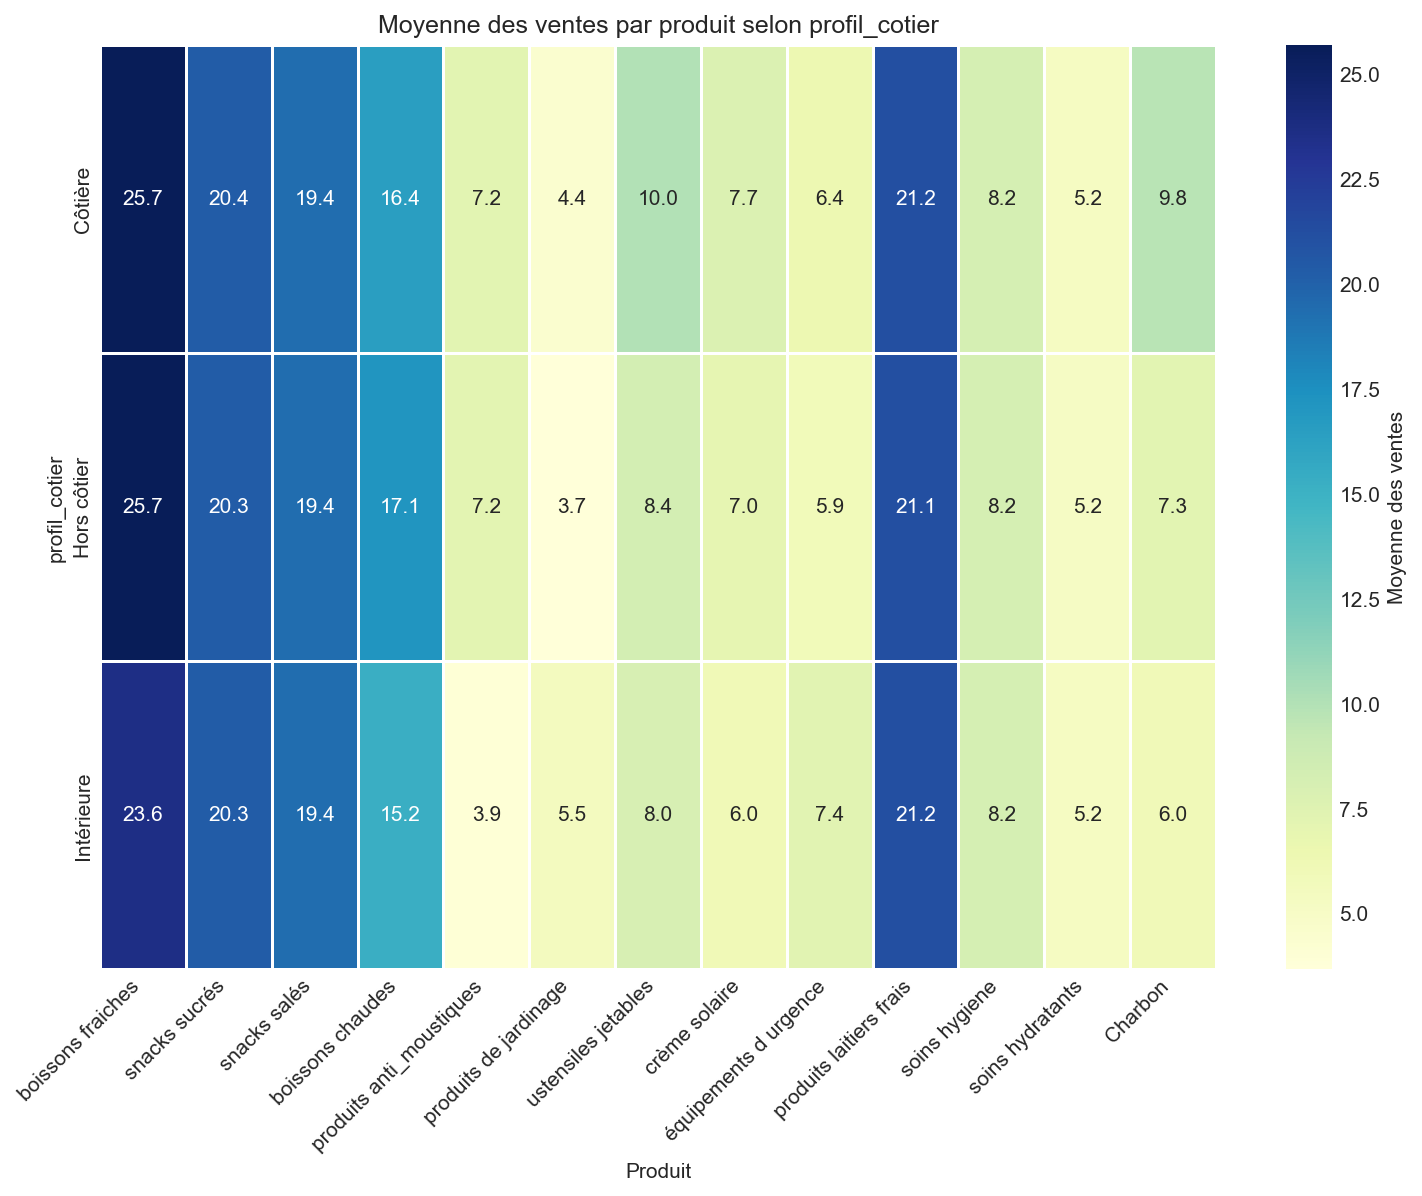

In [279]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colonnes_produits = [
    'boissons fraiches', 'snacks sucrés', 'snacks salés', 'boissons chaudes',
    'produits anti_moustiques', 'produits de jardinage', 'ustensiles jetables',
    'crème solaire', 'équipements d urgence', 'produits laitiers frais',
    'soins hygiene', 'soins hydratants', 'Charbon'
]

# Critère fixe (non interactif)
critere = 'profil_cotier'

def update_plot(critere):
    # Groupement et calcul de la moyenne
    df_grouped = df.groupby(critere)[colonnes_produits].mean()
    
    # Création d'une heatmap avec Seaborn
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        df_grouped,
        annot=True,
        fmt=".1f",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar_kws={'label': 'Moyenne des ventes'}
    )
    
    plt.title(f"Moyenne des ventes par produit selon {critere}")
    plt.xlabel("Produit")
    plt.ylabel(critere)
    plt.xticks(rotation=45, ha='right')
    
    # Sauvegarde automatique
    if not os.path.exists("exports"):
        os.mkdir("exports")
    filename = f"exports/ventes_{critere}.png"
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    print(f"Exporté vers {filename}")
    
    plt.show()

# Appel de la fonction
update_plot(critere)

## Interprétation :
---

| Produit                 | Observations principales                                                                 | Logique / Réalisme                                                                 |
|-------------------------|-----------------------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| Boissons fraîches       | Très hautes ventes pour côtiers (25.7), hors côtiers (25.7), intérieurs un peu moins (23.6) |  **Très réaliste**, il fait plus chaud en bord de mer.                              |
| Snacks salés / sucrés   | Peu de différence (20.3 / 19.4 pour tous)                                               |  **Logique**, ce sont des produits universels.                                       |
| Boissons chaudes        | Plus bas partout, mais particulièrement faible pour Intérieure (15.2 vs 16.4-17.1)       | **Plausible** |
| Produits anti-moustiques| Plus achetés Côtière et Hors côtière (7.2) vs moins en Intérieure (3.9)                 |  **Très réaliste** ! Les moustiques sont plus fréquents dans les zones humides.      |
| Produits de jardinage   |  Côtière (4.41), Hors côtière (3.68), Intérieure (5.53)                                 |                                **Cohérent** : les régions intérieures ont souvent plus d’espaces verts/jardins. Moins sur la côte où l'espace est plus urbain.
| Ustensiles jetables     | 10.0, 8.4, 8.0 (relativement uniforme)                                                  | **Logique** : pique-niques, repas rapides partout.                                  |
| Crème solaire           |Côtière (7.72), Hors côtière (6.98), Intérieure (6.01)                                   | **Très réaliste** : la côte est plus exposée au soleil avec tourisme/plage, d'où un pic de ventes.|
| Équipement d'urgence    | Côtière (6.40), Hors côtière (5.89), Intérieure (7.36)                                  |  **Cohérent** : les régions intérieures peuvent être plus exposées aux coupures de courant ou catastrophes naturelles, expliquant un taux d’équipement plus élevé.                       |
| Produits laitiers frais | 8.2 partout                                                                             | **Réaliste**, produit de consommation quotidienne.                                 |
| Soins hygiène           | 5.2 partout                                                                             |  **Normal**, besoins constants.                                                      |
| Soins hydratants        | 5.2 partout                                                                             | **Logique de base**  |
| Charbon                 | 9.8 (Côtière), 7.3 (Hors Côtier), 6.0 (Intérieure)                                      | **Très réaliste**, le barbecue est une activité estivale très pratiquée sur la côte.|

#   Étape 8️⃣ : Analyse temporelle fine des ventes

## > Analyse mensuelle des ventes par produit avec indicateurs climatiques et saisonniers (Tunisie)

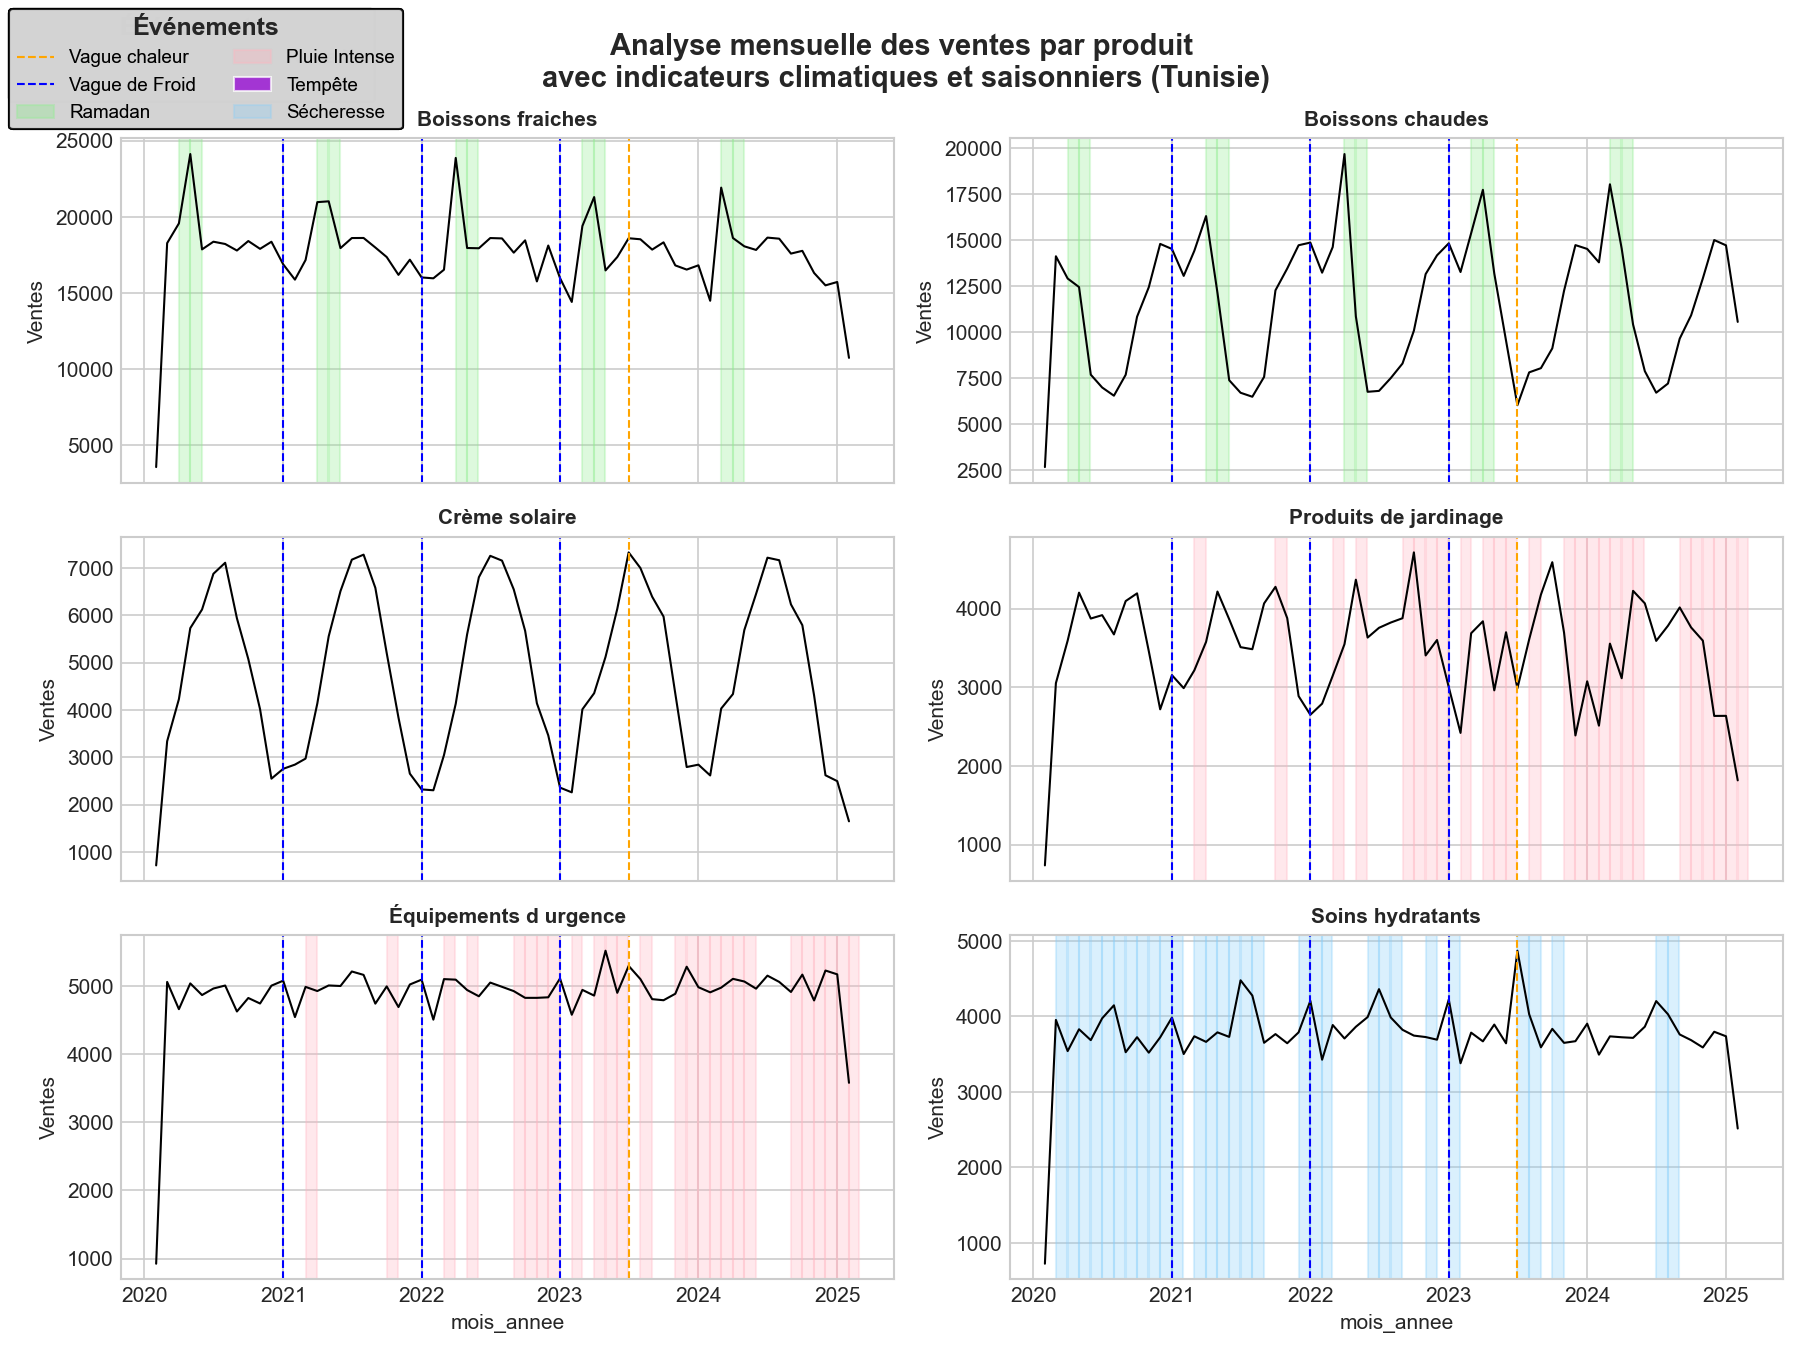

In [204]:
from matplotlib.patches import Patch
# mois_annee' pour les regroupements 
df['date'] = pd.to_datetime(df['date'])
df['mois_annee'] = df['date'].dt.to_period('M')

# Agrégation mensuelle des ventes par produit
ventes_mensuelles = df.groupby('mois_annee')[colonnes_produits].sum()

# Conversion en datetime pour les plots
ventes_mensuelles.index = ventes_mensuelles.index.to_timestamp()
produits=['boissons fraiches','boissons chaudes', 'crème solaire', 'produits de jardinage','équipements d urgence','soins hydratants']
#-----------------------------------------------------------------------
# Dates des événements à partir des indicateurs binaires
dates_vague_chaud = df.loc[df['Indice de Vague de Chaleur'] == 1, 'date'].dt.to_period('M').drop_duplicates().dt.to_timestamp()
dates_vague_froid = df.loc[df['Indice de Vague de Froid '] == 1, 'date'].dt.to_period('M').drop_duplicates().dt.to_timestamp()
dates_tempete = df.loc[df['Indice de Tempête'] == 1, 'date'].dt.to_period('M').drop_duplicates().dt.to_timestamp()
dates_pluie_intense = df.loc[df['Indice de Pluie Intense'] == 1, 'date'].dt.to_period('M').drop_duplicates().dt.to_timestamp()
dates_sech = df.loc[df['Indice de sécheresse'] == 1, 'date'].dt.to_period('M').drop_duplicates().dt.to_timestamp()
dates_ramadan = df.loc[df['Ramadan'] == 1, 'date'].dt.to_period('M').drop_duplicates().dt.to_timestamp()

handles = []
labels = []
# traçage
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 9), sharex=True)
axes = axes.flatten()

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

for i, produit in enumerate(produits):
    sns.lineplot(ax=axes[i], data=ventes_mensuelles[produit],color='black', linewidth=1)
    axes[i].set_title(produit.capitalize(), fontsize=10, weight='bold')
    axes[i].set_ylabel("Ventes")
    axes[i].grid(True)
    # Ajouter les lignes verticales pour les événements
    for date_evt in dates_vague_chaud:
            line = axes[i].axvline(date_evt, color='orange', linestyle='--', linewidth=1)
            if 'Vague chaleur' not in labels:
                handles.append(line)
                labels.append('Vague chaleur')

    for date_evt in dates_vague_froid:
            line = axes[i].axvline(date_evt, color='blue', linestyle='--', linewidth=1)
            if 'Vague de Froid' not in labels:
                handles.append(line)
                labels.append('Vague de Froid')

    if produit == 'boissons fraiches' or produit == 'boissons chaudes':
        for date in dates_ramadan:
            start = date
            end = (date + pd.offsets.MonthEnd(0))
            patch = axes[i].axvspan(start, end, color='lightgreen', alpha=0.3)
        if 'Ramadan' not in labels:
            handles.append(patch)
            labels.append('Ramadan')
    elif produit == 'équipements d urgence' or produit == 'produits de jardinage':
        for date in dates_pluie_intense:
            start = date
            end = (date + pd.offsets.MonthEnd(0))
            patch = axes[i].axvspan(start, end, color='lightpink', alpha=0.3)
            if 'Pluie Intense' not in labels:
                handles.append(patch)
                labels.append('Pluie Intense')
        if not dates_tempete.empty:
            for date in dates_tempete:
                start = date
                end = (date + pd.offsets.MonthEnd(0))
                patch = axes[i].axvspan(start, end, color='violet', alpha=0.3)
                if 'Tempête' not in labels:
                    handles.append(patch)
                    labels.append('Tempête')
        else:
            # Ajouter un patch "fantôme" pour la légende
            patch = Patch(facecolor='darkviolet', alpha=0.7, label='Tempête')
            if 'Tempête' not in labels:
                handles.append(patch)
                labels.append('Tempête')

    elif produit == 'soins hydratants':
        for date in dates_sech:
            start = date
            end = (date + pd.offsets.MonthEnd(0))
            patch = axes[i].axvspan(start, end, color='lightskyblue', alpha=0.3)
        if 'Sécheresse' not in labels:
            handles.append(patch)
            labels.append('Sécheresse')
    # Ajouter la légende globale en haut
    
    fig.legend(handles, labels, loc='upper left', fontsize=9, frameon=True, title="Événements", ncol=2 , facecolor='lightgray',
    edgecolor='black',      
    labelcolor='black',     
    title_fontproperties={'weight': 'bold', 'size': 12} )
# Titre général
plt.suptitle("Analyse mensuelle des ventes par produit \n""avec indicateurs climatiques et saisonniers (Tunisie)" ,fontsize=14, weight='bold')
plt.savefig('evolution_mensuelle6.png',dpi=300)
plt.tight_layout()
plt.show()

In [161]:
if df['Indice de Tempête'].unique() ==[0] :
    print("Il n'y a pas de Tempête en TUNISIE ! ")

Il n'y a pas de Tempête en TUNISIE ! 


|  **Produit**               |  **Indicateurs impactants**                     |  **Commentaires**                                                                 |
|------------------------------|------------------------------------------------|------------------------------------------------------------------------------------|
| **Soins hydratants**         |  **+ Sécheresse**                                  | La sécheresse assèche la peau → hausse des achats de soins hydratants.             |
| **Équipements d’urgence**    |  **+ Pluie intense** <br> **+ Tempêtes**               | Ventes boostées pendant intempéries (ex. : coupures de courant → besoins urgents). |
| **Produits de jardinage**    |  **Sécheresse (léger +)** <br>  **Pluie intense (-)** | Fortes pluies = moins de jardinage. Sécheresse = léger regain d’intérêt.           |
| **Crème solaire**            |  **+ Vague de chaleur** <br> **- Autres événements**  | Pic évident en canicule. Peu sensible au reste (Ramadan, pluie, etc.).            |
| **Boissons fraîches**        |  **+ Vague de chaleur** <br>  **+ Ramadan (si été)**    | Dépend fortement de la chaleur et du Ramadan (en période estivale).               |
| **Boissons chaudes**         | **+ Vagues de froid** <br> **+ Ramadan**                             | Pics nets en hiver. Aucun impact des autres aléas climatiques.                     |
> ***Ces résultats montrent que mes données de ventes synthétiques reproduisent des tendances réalistes et crédibles : les pics ou baisses des ventes apparaissent aux moments attendus, en fonction des différents facteurs climatiques et saisonniers. Cela valide la cohérence des données simulées et renforce la crédibilité de mon modèle d’analyse pour des études réelles.***

## > Distribution des ventes de charbon par saison

C:\Users\salma souissi\AppData\Local\Temp\ipykernel_9132\1301987153.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




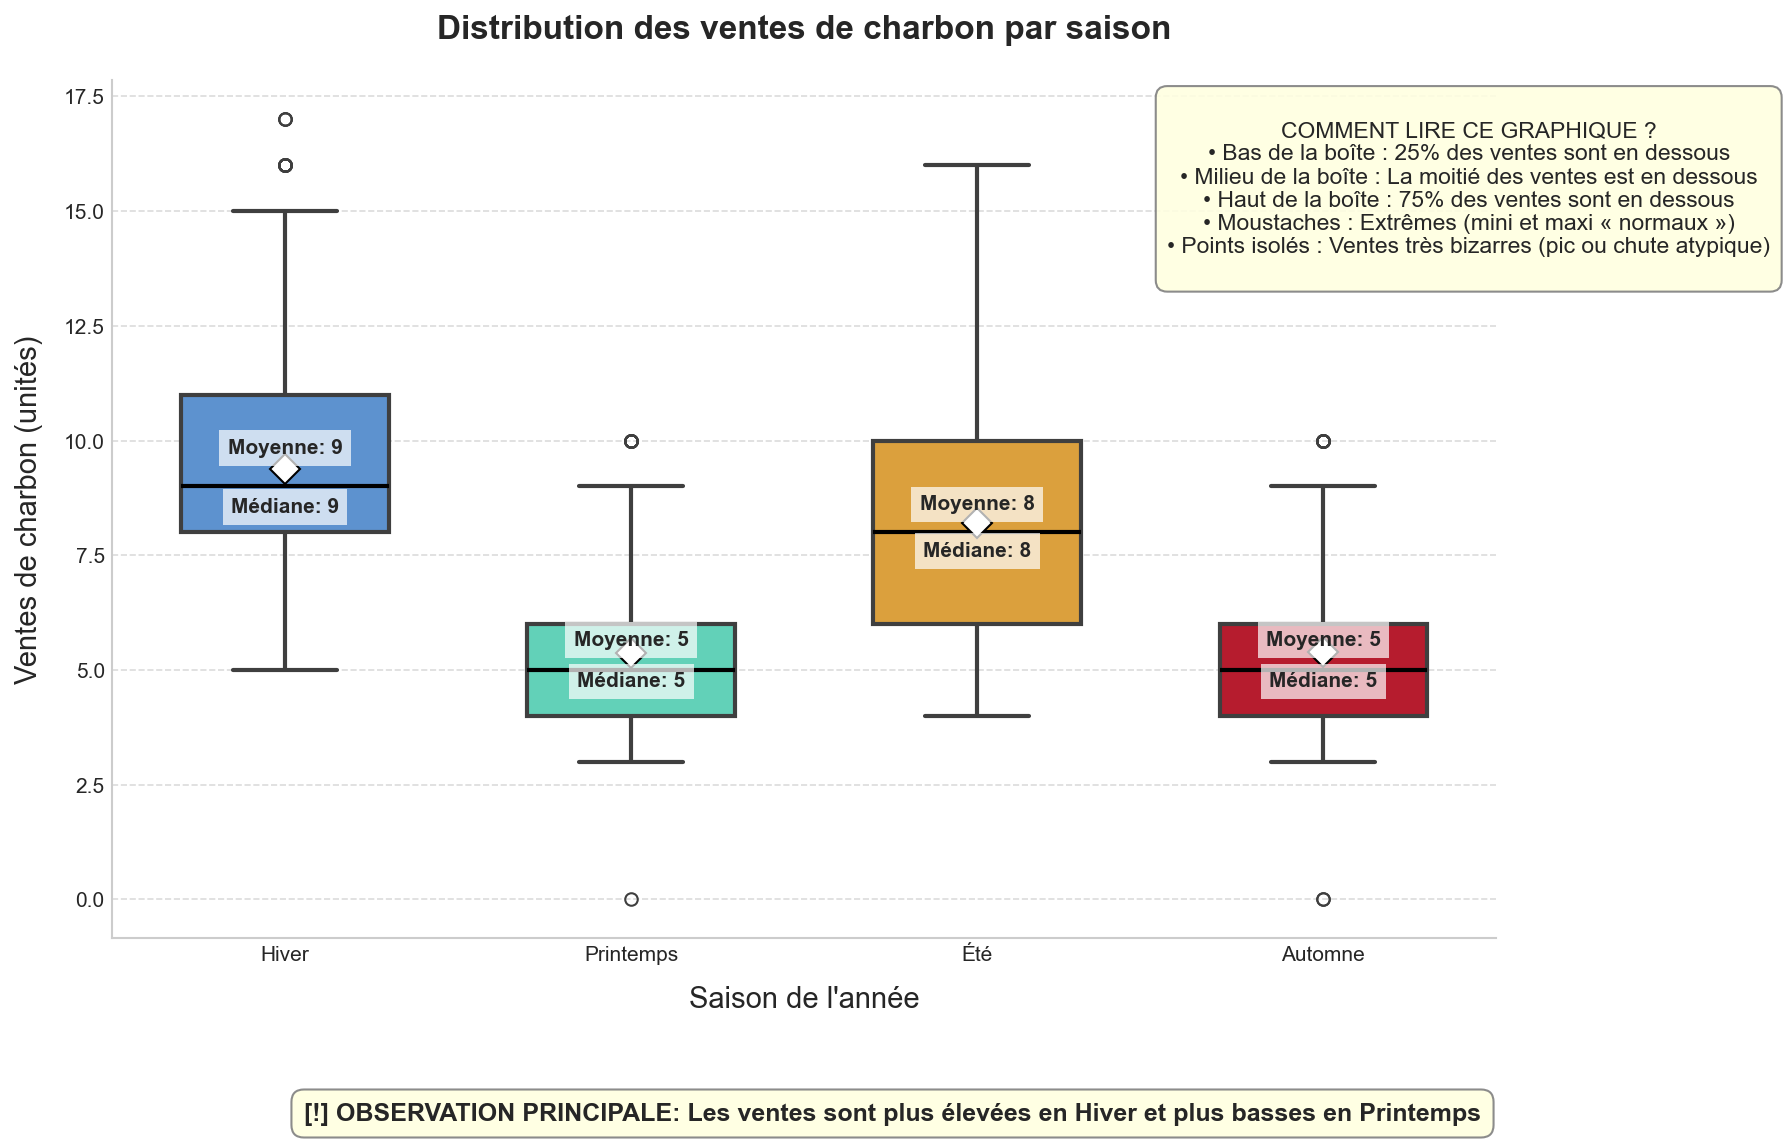

In [207]:
# détermination de la saison à partir du mois
def get_saison(mois):
    if mois in [12, 1, 2]:
        return 'Hiver'
    elif mois in [3, 4, 5]:
        return 'Printemps'
    elif mois in [6, 7, 8]:
        return 'Été'
    else:
        return 'Automne'

# Ajout de la colonne saison au dataframe
df['saison'] = df['mois'].apply(get_saison)

# couleurs par saison (avec des couleurs évocatrices)
palette = {
    'Hiver': '#4A90E2',        # Bleu
    'Printemps': '#50E3C2',    # Vert clair
    'Été': '#F5A623',          # Orange/Jaune
    'Automne': '#D0021B'       # Rouge
}

# ------------------------------------------
plt.figure(figsize=(12, 8))

# boxplot
ax = sns.boxplot(
    x='saison',
    y='Charbon',
    data=df,
    order=['Hiver', 'Printemps', 'Été', 'Automne'],
    palette=palette,
    showmeans=True,
    meanprops={
        'marker': 'D',         # Marqueur en forme de diamant pour la moyenne
        'markerfacecolor': 'white',
        'markeredgecolor': 'black',
        'markersize': 10
    },
    medianprops={
        'color': 'black',      # Ligne noire pour la médiane
        'linewidth': 2
    },
    width=0.6,                 # Réduire la largeur des boîtes
    linewidth=2
)

# Calculer les statistiques par saison
stats_par_saison = {}
grouped = df.groupby('saison')['Charbon']

for saison in ['Hiver', 'Printemps', 'Été', 'Automne']:
    data = grouped.get_group(saison)
    stats_par_saison[saison] = {
        'médiane': np.median(data),
        'moyenne': np.mean(data),
        'q1': np.percentile(data, 25),
        'q3': np.percentile(data, 75),
        'min': np.min(data),
        'max': np.max(data)
    }

#Annotations 
for i, saison in enumerate(['Hiver', 'Printemps', 'Été', 'Automne']):
    stats = stats_par_saison[saison]
    
    # Annoter la médiane
    plt.text(i, stats['médiane'] - (0.05 * stats['médiane']), 
             f'Médiane: {stats["médiane"]:.0f}', 
             ha='center', va='center', fontsize=10, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    
    # Annoter la moyenne
    plt.text(i, stats['moyenne'] + (0.05 * stats['moyenne']), 
             f'Moyenne: {stats["moyenne"]:.0f}', 
             ha='center', va='center', fontsize=10, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

#Annotation explicative :
explanation_text = """
COMMENT LIRE CE GRAPHIQUE ?
• Bas de la boîte : 25% des ventes sont en dessous
• Milieu de la boîte : La moitié des ventes est en dessous
• Haut de la boîte : 75% des ventes sont en dessous
• Moustaches : Extrêmes (mini et maxi « normaux »)
• Points isolés : Ventes très bizarres (pic ou chute atypique)
"""

# Ajouter l'explication dans un encadré
plt.annotate(explanation_text, xy=(0.98, 0.98), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', alpha=0.9, 
                      edgecolor='gray', linewidth=1),
             ha='center', va='top', fontsize=11)

# Titre et étiquettes des axes avec plus d'explications
plt.title("Distribution des ventes de charbon par saison", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Saison de l'année", fontsize=14, labelpad=10)
plt.ylabel("Ventes de charbon (unités)", fontsize=14, labelpad=10)

#grille 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Interprétation
max_season = max(stats_par_saison, key=lambda x: stats_par_saison[x]['médiane'])
min_season = min(stats_par_saison, key=lambda x: stats_par_saison[x]['médiane'])

plt.figtext(0.5, 0.01, 
            f"[!] OBSERVATION PRINCIPALE: Les ventes sont plus élevées en {max_season} et plus basses en {min_season}",
            ha='center', fontsize=12, fontweight='bold',
            bbox=dict(facecolor='lightyellow', alpha=0.9, edgecolor='gray', linewidth=1, boxstyle='round,pad=0.5'))
# Nettoyer le style et ajuster l'espacement
sns.despine()
plt.tight_layout(rect=[0, 0.08, 1, 0.95])  # Ajuster pour laisser de la place aux 
#plt.savefig('boxplot_charbon.png',dpi=300)

plt.show()

## Interprétation des résultats

* **Saisonnalité marquée :** Les ventes de charbon suivent un cycle saisonnier évident, avec un pic en hiver et un creux au printemps/automne.
* **Demande hivernale :** La demande en charbon est logiquement plus forte en hiver, probablement liée aux besoins de chauffage pendant la saison froide.
* **Consommation estivale surprenante :** Les ventes en été sont relativement élevées (8 unités), ce qui pourrait s'expliquer par d'autres usages du charbon (barbecues, industrie) ou par des achats anticipés pour l'hiver suivant.
* **Stabilité des moyennes et médianes :** Pour chaque saison, la moyenne et la médiane sont identiques, indiquant des distributions relativement symétriques des ventes.
* **Variabilité plus importante en hiver et été :** La dispersion plus grande pendant ces saisons suggère que les facteurs influençant les ventes (comme la température) sont plus variables qu'au printemps et en automne.
## Implications commerciales

>  **Gestion des stocks :** Il serait judicieux d'augmenter les stocks avant l'hiver et l'été pour satisfaire la demande accrue.

> **Stratégie marketing :** Des promotions pourraient être envisagées au printemps et en automne pour stimuler les ventes pendant ces périodes creuses.

> **Planification de la production :** La production devrait être ajustée pour anticiper les pics de demande hivernaux.

> **Prévisions financières :** Les projections de revenus devraient tenir compte de cette cyclicité saisonnière, avec des prévisions plus élevées pour l'hiver et l'été.



# Etape9️⃣ : Analyse de l’effet combiné météo + événement 
> ## (New_year + Météo ) ❗ 

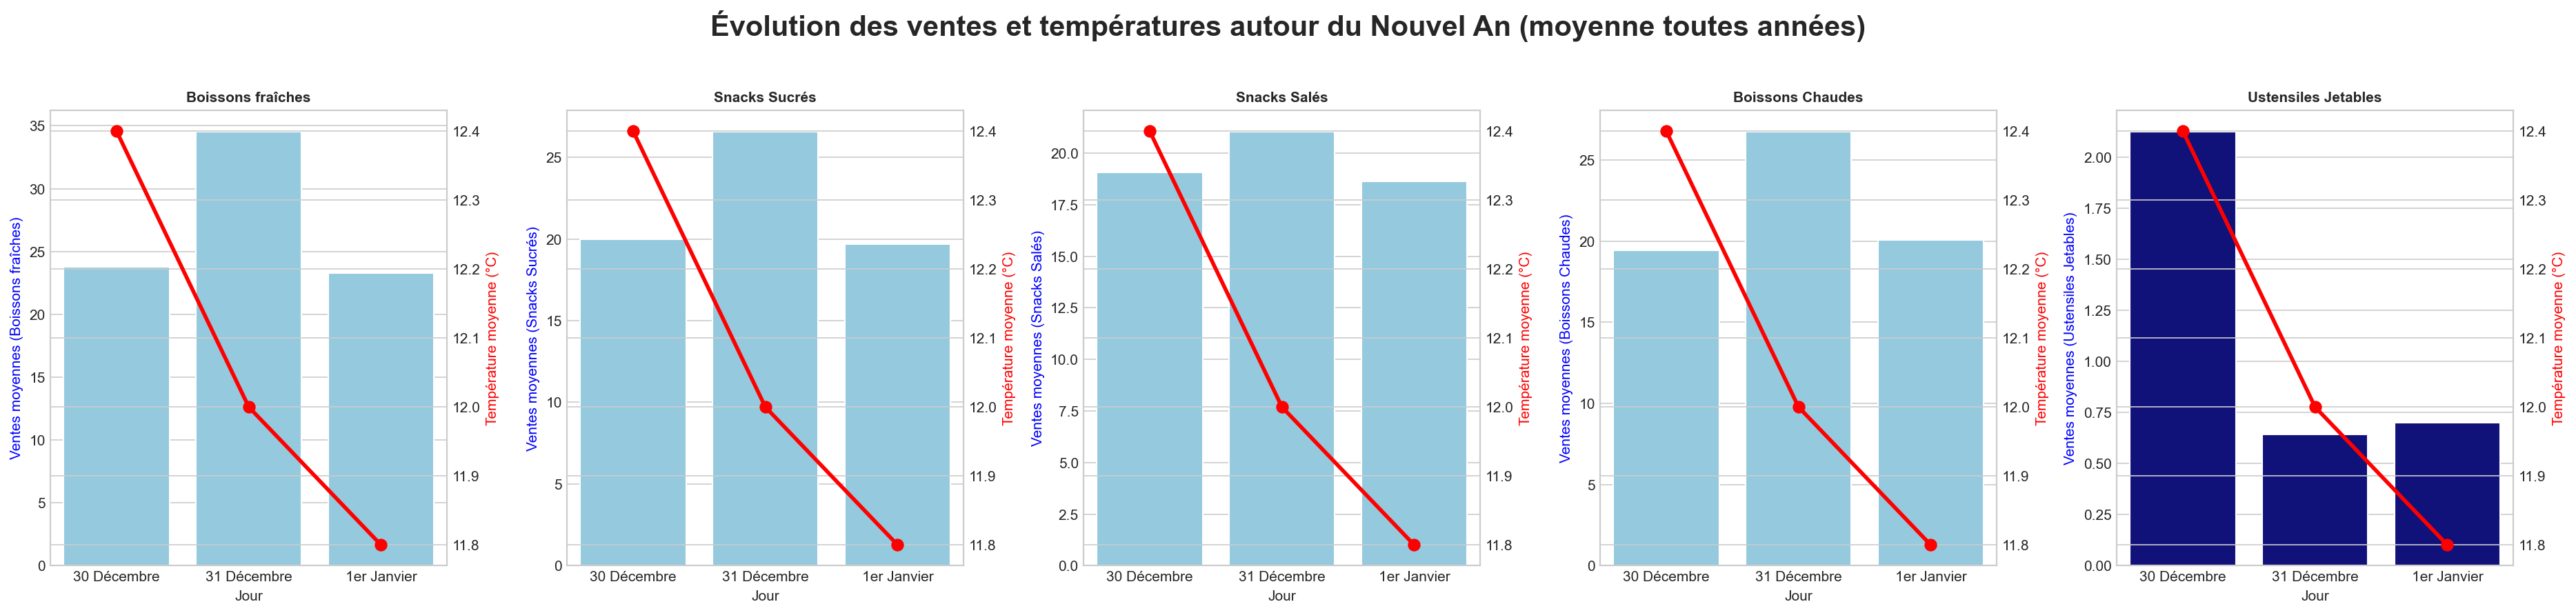

In [235]:

df['année'] = df['date'].dt.year
df['jour_mois'] = df['date'].dt.strftime('%d-%m')

# Filtrer uniquement les 30 déc, 31 déc, 1 janv
df_filtered = df[df['jour_mois'].isin(['30-12', '31-12', '01-01'])].copy()

# Créer la colonne 'jour_relative'
df_filtered['jour_relative'] = df_filtered['jour_mois'].map({
    '30-12': '30 Décembre',
    '31-12': '31 Décembre',
    '01-01': '1er Janvier'
})
# Grouper par jour_relative pour moyenne
df_filtered_grouped = (
    df_filtered.groupby('jour_relative')[['boissons fraiches', 'température']]
    .mean()
    .reindex(order_jours)  # pour garder l'ordre voulu
    .reset_index()
)

# Liste des produits à afficher
produits = ['boissons fraiches', 'snacks sucrés', 'snacks salés','boissons chaudes','ustensiles jetables']
titres = ['Boissons fraîches', 'Snacks Sucrés', 'Snacks Salés','Boissons Chaudes','Ustensiles Jetables']

# Initialiser la figure
fig, axes = plt.subplots(1, len(produits), figsize=(5 * len(produits), 6), sharey=False)

for i, (produit, titre) in enumerate(zip(produits, titres)):
    # Grouper par jour_relative
    grouped = (
        df_filtered.groupby('jour_relative')[[produit, 'température']]
        .mean()
        .reindex(order_jours)
        .reset_index()
    )
    
    ax1 = axes[i]
    
    # Bar plot pour ventes moyennes
    if produit =='ustensiles jetables' :
        
        sns.barplot(data=grouped, x='jour_relative', y=produit, ax=ax1, color='darkblue')
        ax1.set_ylabel(f'Ventes moyennes ({titre})', color='blue')
        ax1.set_xlabel('Jour')
    else : 
        sns.barplot(data=grouped, x='jour_relative', y=produit, ax=ax1, color='skyblue')
        ax1.set_ylabel(f'Ventes moyennes ({titre})', color='blue')
        ax1.set_xlabel('Jour')
        
    # Axe secondaire pour température
    ax2 = ax1.twinx()
    sns.pointplot(data=grouped, x='jour_relative', y='température', ax=ax2, color='red')
    ax2.set_ylabel('Température moyenne (°C)', color='red')
    
    ax1.set_title(titre,fontsize=10, fontweight='bold')

fig.suptitle('Évolution des ventes et températures autour du Nouvel An (moyenne toutes années)', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('inter_meteo_nouvelAN.png',dpi=300)
plt.show()



> **Boissons Fraîches** : Ventes fortement événementielles autour du 31 décembre, peu influencées par la température.

> **Boissons Chaudes** : Les boissons chaudes sont sans doute moins "festives", donc leur pic est plus modéré. Le froid explique leur niveau global élevé, mais le pic du 31 est plutôt lié à l’événement

> **Snacks Sucrés** : Achat événementiel typique des fêtes (apéritifs/desserts), boosté le 31/12.

> **Snacks Salés** : Même tendance que sucrés, mais l’effet est moins amplifié – peut-être car ce type de produit est consommé plus régulièrement et pas seulement pour les fêtes.Même tendance que sucrés, mais l’effet est moins amplifié – peut-être car ce type de produit est consommé plus régulièrement et pas seulement pour les fêtes.

> **Ustensiles Jetables** : Les gens anticipent : ils achètent les ustensiles avant le jour J, pour préparer la fête. Le 31 et 1er, presque plus d’achats (utilisation, pas achat).
##  Globalement :
* Température ≈ stable → aucun produit n’est impacté par la météo ici.

➡ Tous les pics sont dus à l’événementiel (Nouvel An) :

* Boissons/snacks : boost jour-même.

* Ustensiles : boost anticipé (veille). 
> ***« Globalement, la logique métier a bien été respectée dans la génération des données : <br> événements calendaires et saisonnalité météo ont été intégrés de façon distincte, permettant d’observer des schémas réalistes. »***


# Etape 🔟 : Tester l’effet mémoire des conditions météo sur le comportement des consommateurs :

> ## Les gens réagissent-ils instantanément à la météo ou avec un décalage ?
> ## Certaines conditions passées influencent-elles encore les ventes ?
---

## 1️⃣ Corrélation avec les ventes :
> ### La météo d’hier / avant-hier / la semaine passée influence-t-elle encore les ventes aujourd’hui ?

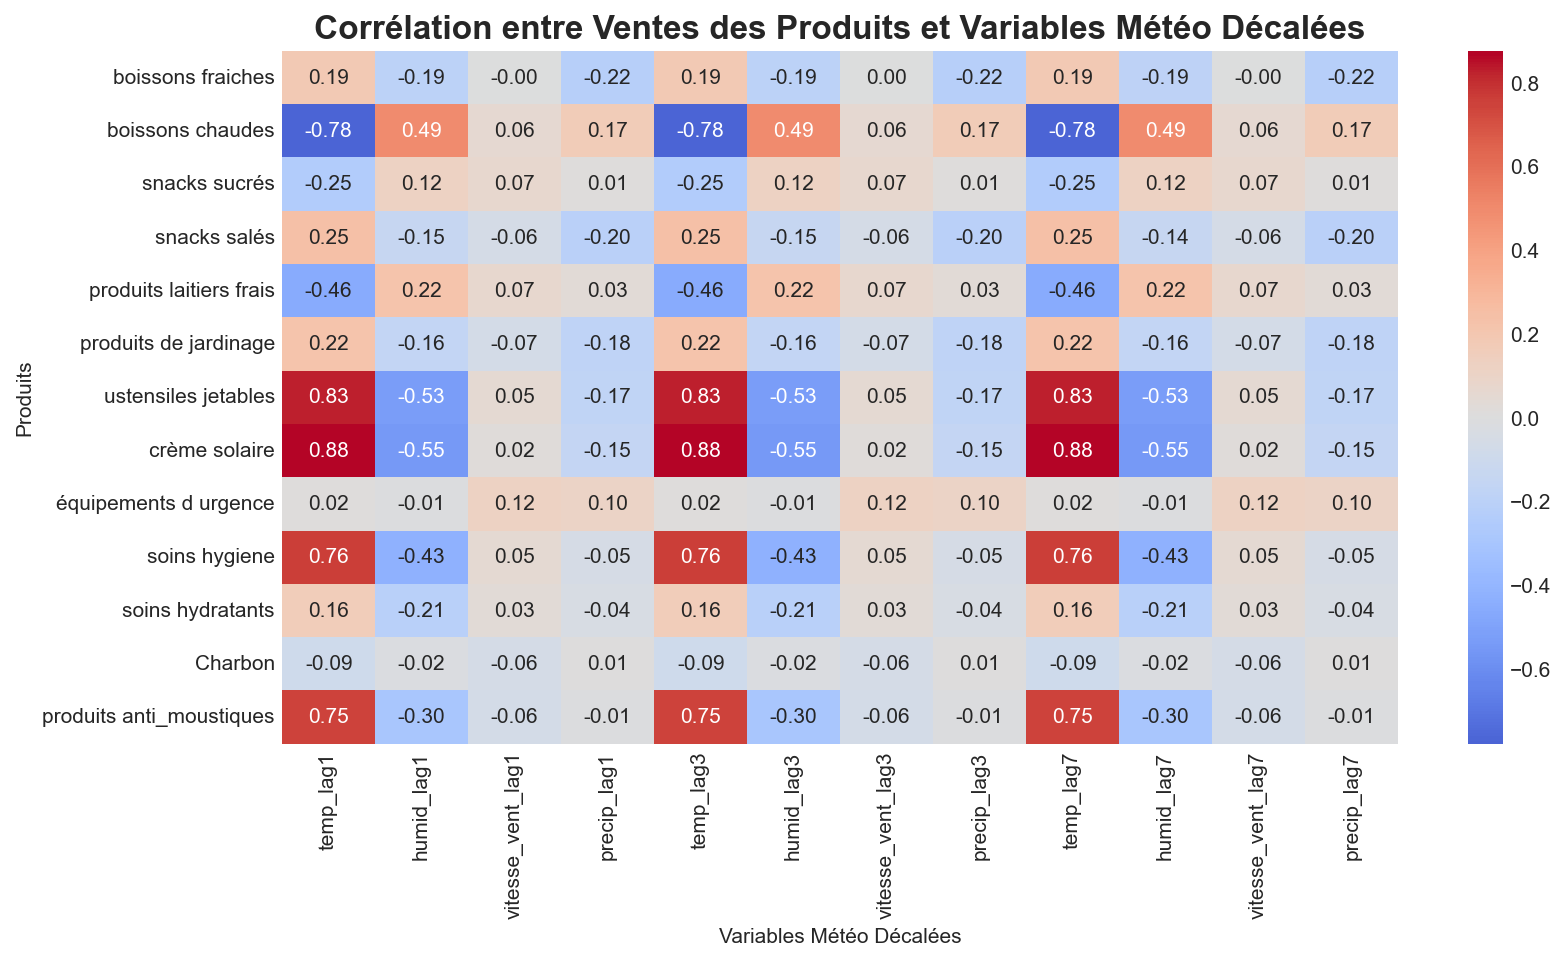

In [253]:


produits = ['boissons fraiches', 'boissons chaudes', 'snacks sucrés',
       'snacks salés', 'produits laitiers frais', 'produits de jardinage',
       'ustensiles jetables', 'crème solaire', 'équipements d urgence',
       'soins hygiene', 'soins hydratants', 'Charbon',
       'produits anti_moustiques']
lags = [1, 3, 7]
vars_meteo = ['temp', 'humid', 'vitesse_vent', 'precip']

# Préparer une DataFrame pour stocker les corrélations
corr_data = pd.DataFrame(index=produits)

for lag in lags:
    for var in vars_meteo:
        col_name = f'{var}_lag{lag}'
        corr_list = []
        for produit in produits:
            corr = df[produit].corr(df[col_name])
            corr_list.append(corr)
        corr_data[col_name] = corr_list

# Plot global heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Corrélation entre Ventes des Produits et Variables Météo Décalées',fontsize=16,fontweight='bold')
plt.xlabel('Variables Météo Décalées')
plt.ylabel('Produits')
plt.savefig('coor_lag.png',dpi=300)
plt.show()

##  Interprétation :
---
### 1.  Les corrélations fortes (positives) :
* **Crème solaire :**
  
Corrélation très forte avec temp_lag1 (+0.88), stable sur lag3 et lag7.

➔ logique → plus il fait chaud (même avec retard), plus la crème solaire se vend. Très cohérent avec la réalité !

* **Ustensiles jetables :**

Corrélation +0.83 avec temp_lag1 (aussi stable sur lag3 et lag7).

➔ probablement lié aux pique-niques, barbecues quand il fait chaud.

* **Soins hygiène et produits anti-moustiques :**
  
Corrélation ~+0.75 avec temp_lag1.

➔ Interprétation : la chaleur favorise la vente de ces produits  + hygiène estivale.
### 2. Les corrélations fortes (négatives) :
* **Boissons chaudes :**
  
Corrélation très négative avec temp_lag1 (-0.78), inversement avec humid_lag1 (+0.49).

➔ logique  → quand il fait chaud, les ventes chutent ; mais l'humidité semble les booster un peu.

* **Produits laitiers frais :**
  
Corrélation modérément négative avec temp_lag1 (-0.46), petit effet positif avec humidité.
###  3. Faibles corrélations :
* **Charbon, équipements d’urgence, soins hydratants :**
  
Corrélations faibles (< |0.2|) → difficile de dire s'il y a un lien direct avec la météo.

➔ soit ces ventes dépendent d'autres facteurs (festivals, promotions...), soit les effets météo sont indirect
### 4. Produits anti-moustiques : légère corrélation positive avec humidité et précipitations.
**Pourquoi ?**

> Les moustiques  ont besoin d'eau stagnante pour se reproduire. Leur cycle de vie dépend directement de :<br>
> * **l'humidité** : un environnement humide favorise leur survie et leur prolifération.<br>
>* **les précipitations**: la pluie crée des flaques d’eau, des eaux stagnantes (bassins, pots de fleurs remplis d’eau...), qui sont des nids parfaits pour la ponte.

➡️ Donc : Quand il pleut ou que l'air devient très humide, quelques jours plus tard, la population de moustiques augmente, provoquant :

Plus de piqûres et de nuisances.

Une hausse des achats de produits répulsifs ou curatifs (sprays, lotions...).
#### **Preuve Scientifique :**
Des études (ex : Githeko et al., 2000) ont montré que :

L’augmentation des précipitations + chaleur = explosion de moustiques.

Les cycles de reproduction peuvent s’accélérer en cas de forte humidité.

> Référence :
[Githeko, A.K., Lindsay, S.W., Confalonieri, U.E., & Patz, J.A. (2000). Climate change and vector-borne diseases: a regional analysis. Bulletin of the World Health Organization](https://iris.who.int/handle/10665/268220)
### 5. Stabilité des résultats :
Les patterns sont stables entre lag1, lag3, et lag7 (exemple : crème solaire, ustensiles jetables), ce qui est bien : 

**cela suggère que l'effet météo n'est pas seulement immédiat mais dure quelques jours.**

> ## La météo d’hier / avant-hier / la semaine passée influence-t-elle encore les ventes aujourd’hui ?
> **Oui** : la météo d’hier, d’avant-hier, et même de la semaine passée influence encore les ventes aujourd’hui. Mes données montrent une stabilité impressionnante des corrélations dans le temps, surtout pour les produits très sensibles à la météo (crème solaire, jetables...).
Cela peut s'expliquer par plusieurs phénomènes :<br>
> * Les achats réactifs (ex : il fait chaud → j’achète direct)<br>
> * Les achats anticipés ou prolongés (ex : on prévoit un barbecue dans quelques jours) 
---

## 2️⃣ Analyse combinée météo + lag
> ### Aujourd’hui il fait chaud mais il faisait froid hier → cela a-t-il un effet ?

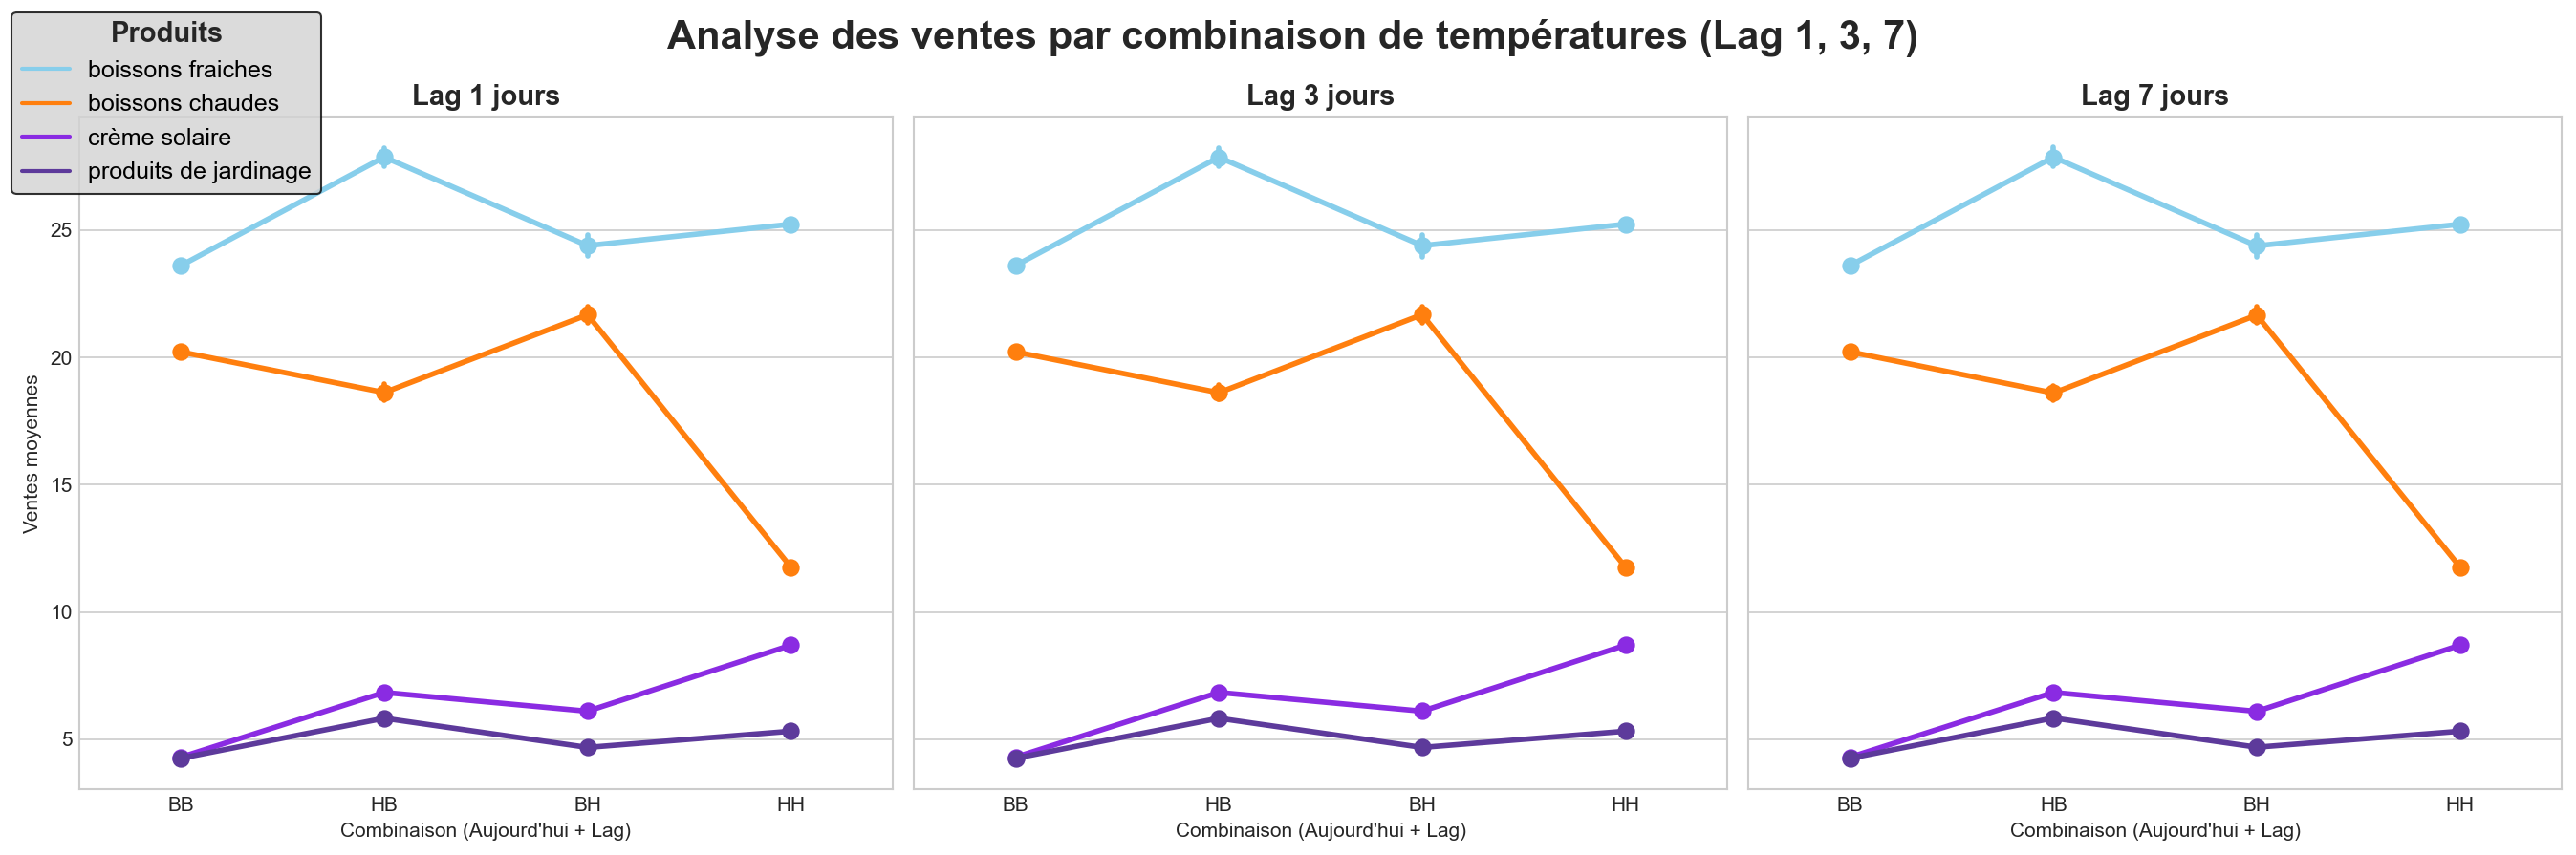

In [274]:

from matplotlib.lines import Line2D

# Initialisation figure globale
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

products = ['boissons fraiches', 'boissons chaudes', 'crème solaire', 'produits de jardinage']
lags = [1, 3, 7]

# Palette :
palette = {
    'boissons fraiches': 'skyblue',   
    'boissons chaudes': '#ff7f0e',    
    'crème solaire': '#8a2be2',       # violet classique
    'produits de jardinage': '#5d3a9b'  # violet foncé
}

for ax, lag in zip(axes, lags):
    # Catégorisation des températures pour chaque lag
    df['temp_cat'] = np.where(df['température'] >= df['température'].median(), 'H', 'B')
    df[f'temp_lag{lag}_cat'] = np.where(df[f'temp_lag{lag}'] >= df[f'temp_lag{lag}'].median(), 'H', 'B')
    df['temp_combo'] = df['temp_cat'] + df[f'temp_lag{lag}_cat'] #{'HH' → Haute aujourd’hui + Haute en lag}
                                                                #{'HB' → Haute aujourd’hui + Basse en lag}
                                                                #{'BH' → Basse aujourd’hui + Haute en lag}
                                                                #{'BB' → Basse aujourd’hui + Basse en lag}

    # Tracer les produits avec des couleurs fixes
    for product in products:
        sns.pointplot(
            x='temp_combo',
            y=product,
            data=df,
            errorbar=('ci', 95),
            ax=ax,
            label=product,
            color=palette[product]
        )

    ax.set_title(f"Lag {lag} jours",fontsize=14 , fontweight='bold')
    ax.set_xlabel("Combinaison (Aujourd'hui + Lag)")
    ax.set_ylabel("Ventes moyennes")
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Créer la légende globale personnalisée
legend_elements = [Line2D([0], [0], color=palette[prod], lw=2, label=prod) for prod in products]
fig.legend(
    handles=legend_elements,
    loc='upper left',
    fontsize=12,
    frameon=True,
    title="Produits",
    ncol=1,
    facecolor='lightgray', 
    edgecolor='black',
    labelcolor='black',
    title_fontproperties={'weight': 'bold', 'size': 14}
)


plt.suptitle("Analyse des ventes par combinaison de températures (Lag 1, 3, 7)", fontsize=20,fontweight='bold')
plt.tight_layout()
plt.savefig('comb_temp_lag.png',dpi=300)
plt.show()


## Interprétation :

####  **Boissons fraîches**  
-  Toujours élevée (~24-28 ventes moyennes)  
-  **Effet immédiat** des températures élevées (points HB/HH hauts)  
- Pic autour de HB → Hausse notable quand il fait chaud aujourd'hui (peu importe le passé)  
 ➔ Réaction instantanée à la chaleur actuelle.  

####  **Boissons chaudes**  
- Chute nette en cas de chaleur actuelle (HH : ~12 ventes vs ~20 en BB/BH)  
- **Stabilité** si froid aujourd'hui  
- **Effet négatif fort** si chaud aujourd'hui (même avec passé froid)  
  ➔ Sensibilité extrême à la température du jour.  

####  **Crème solaire**  
- Forte hausse en HH (~9 ventes vs ~4-5 en BB)  
- Pic lié **uniquement** à la chaleur actuelle  
- Effet lag négligeable  
 ➔ Achat impulsif lors des journées chaudes.  

####  **Produits de jardinage**  
- Courbe plate (~4-6 ventes)  
-  Léger pic en HB (chaud aujourd'hui + froid passé)  
 ➔ Peu sensible à la météo → **achats planifiés** plutôt qu'impulsifs.
## Synthèse :
| Produit                | Impact météo du jour  | Impact météo passée | Insight                                                                |
|------------------------|-----------------------|---------------------|--------------------------------------------------------------------------------|
| **Boissons fraîches**  |  **Fort**           |  **Faible**           | Achats immédiats dès qu'il fait chaud (> +25% en HH vs BB)                     |
| **Boissons chaudes**   |  **Très fort**      |  **Faible**           | Forte baisse quand il fait chaud le jour J.          |
| **Crème solaire**      |  **Très fort**      |  **Faible**           | Hausse nette en cas de chaleur actuelle • Lag négligeable             |
| **Produits jardinage** |  **Modéré**         |  **Modéré**           | Peu d’effet clair, peut-être un peu plus vendu quand il fait chaud récemment.|


# Etape 1️⃣1️⃣ : Implications Commerciales
---


## D'après les  Corrélations des produits avec les conditions climatiques
---

| **Produit**                      | **Stratégie**                                                                                                 | **Préparation / Logistique**                                                                                                       |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **Produits laitiers frais**      | Promotions ciblées dès que la température dépasse la moyenne saisonnière (notifications, affiches).           | Renforcer les stocks avant les périodes chaudes + humidité élevée (ex. avant l'été).                                               |
| **Snacks sucrés**                | Associer la vente à des événements saisonniers (festivals, vacances scolaires).                               | Créer des packs "été actif" ou "pique-nique" avec snacks + boissons.                                                               |
| **Snacks salés**                 | Ventes croisées avec produits barbecue/apéro par météo clémente.                                              | Réduire les promotions quand des périodes pluvieuses sont prévues.                                                                 |
| **Boissons fraîches**            | Campagnes météo-dépendantes ("-10% aujourd’hui s’il fait chaud").                                             | Assurer des réassorts rapides lors des pics de chaleur.                                                                            |
| **Boissons chaudes**             | Offres automnales et hivernales.                                                                              | Diminuer les stocks avant la saison chaude, liquider progressivement, réduire la visibilité et la taille des présentoirs en rayon. |
| **Soins solaires**               | Mise en avant dès la hausse des températures/UV.                                                              | Partenariats avec pharmacies/parapharmacies en printemps-été.                                                                      |
| **Produits anti-moustiques**     | Ciblage météo : publicités et promotions lors des pics de chaleur + humidité.                                 | Informer sur les risques d’insectes lors des périodes propices (achat préventif).                                                  |
| **Produits de jardinage**        | Campagnes saisonnières dès le printemps + ateliers jardinage sponsorisés.                                     | Adapter les stocks à la météo (plus de stock si printemps/été chauds prévus).                                                      |
| **Ustensiles jetables**          | Vente couplée avec snacks/charbon en été (kits pique-nique).                                                  | Campagnes ciblées pour les événements extérieurs (matchs, festivals…).                                                             |
| **Soins d’hygiène & hydratants** | Soins hydratants : campagnes protection peau sèche quand chaleur/sécheresse augmente.                         | Soins d’hygiène : maintien des niveaux d'approvisionnement constants.                                                              |
| **Équipements d’urgence**        | Campagnes pédagogiques ("Soyez prêts !") en anticipation des périodes à risque météo (vents forts, tempêtes). | Vérifier les stocks saisonniers, prévoir ventes flash en cas d'alerte météo.                                                       |
| **Charbon**                      | Offres groupées (charbon + viande + ustensiles jetables) dès météo estivale prévue.                           | Mise en avant des barbecues avril/mai jusqu’à fin août.                                                                            |
---

## D'après les Corrélations entre Boissons et Snacks


---

| **Corrélation clé**                               | **Implications commerciales**                                                                                                                                                                                               |
|---------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Boissons fraîches + Snacks salés (0.58)           | Met en lumière une opportunité claire d'associer ces produits : packs promotionnels en été, campagnes ciblées lors d’événements sportifs ou festifs. Nécessite un stock renforcé en période estivale ou lors de vagues de chaleur. |
| Boissons chaudes + Snacks sucrés (0.56)           | Suggère des stratégies marketing saisonnières (automne/hiver) : développer des offres combinées (café + biscuits), organiser des animations en magasin autour des pauses gourmandes.                                          |
| Boissons fraîches + Snacks sucrés (0.49)          | Encourage des ventes croisées : proposer des packs « fraîcheur sucrée » et ajuster la communication marketing autour de la notion de plaisir et rafraîchissement simultané, surtout en période estivale.                        |
| Toutes ces associations                           | Soulignent l'intérêt de concevoir des stratégies météo-sensibles, de prévoir des hausses ponctuelles de la demande selon la saison, et d'explorer des partenariats avec des événements festifs pour booster les ventes.         |
---
## D'après l' Impact des périodes sur les ventes 
---
| **Catégorie**                     | **Événement**               | **Constats clés**                                                                                                                                  | **Implications commerciales**                                                                                                                                                 |
|-----------------------------------|-----------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Boissons & Snacks                 | Ramadan                     | Forte hausse : +30% en moyenne, pic pour les boissons chaudes (+39.8%)                                                                                | Prévoir des stocks renforcés avant Ramadan, lancer des offres spéciales iftar (packs combos), adapter la communication sur les pauses gourmandes après le jeûne.                |
|                                   | Nouvel An                   | Boissons fraîches +30%, snacks sucrés +26.6%                                                                                                         | Mettre en place des packs fête (snacks + boissons), communication festive début décembre, prévoir une logistique rapide (pénuries à éviter en fin d'année).                     |
|                                   | Weekends/Jours fériés       | Légère hausse générale                                                                                                                               | Encourager la consommation avec des mini-offres week-end, visuels incitatifs en rayon sur les moments conviviaux.                                                               |
| Produits Extérieurs               | Vacances scolaires          | Jardinage +13.3%, ustensiles jetables +13.3%                                                                                                         | Promouvoir des kits jardinage + pique-nique, campagnes ciblées autour des vacances scolaires, optimiser la mise en rayon en amont des vacances.                                 |
|                                   | Jours fériés                | Hausse : jardinage +9.5%, ustensiles +13.9%                                                                                                          | Lancer des mini-événements en magasin (« barbecues prêts à l'emploi »), vente croisée avec produits alimentaires pour barbecue.                                                 |
|                                   | Ramadan                     | Baisse générale sauf jardinage léger                                                                                                                 | Réduire temporairement les stocks de saison pour ces articles, focus marketing sur l'intérieur (décoration, ustensiles de cuisine).                                             |
|                                   | Nouvel An                   | Faible consommation                                                                                                                                | Limiter la mise en avant, privilégier les surfaces pour produits festifs plus demandés (snacks, boissons).                                                                     |
| Produits Spéciaux                 | Ramadan                     | Produits laitiers frais : +31%                                                                                                                       | Offres « petit-déjeuner/iftar complet », communications santé et fraîcheur, chaîne logistique renforcée pour limiter les ruptures de stock.                                     |
|                                   | Nouvel An                   | Charbon +9.5%                                                                                                                                        | Associer le charbon aux rayons barbecue/snacks, rappeler l’option de repas extérieurs même en période hivernale (marketing visuel chaleureux).                                   |
|                                   | Weekends/Jours fériés       | Légère hausse du charbon                                                                                                                             | Packs barbecue + charbon + boissons, communication sur les « week-ends barbecue » en période clé (printemps/été).                                                               |
| Soins d’hygiène & hydratants      | Toutes périodes             | Niveaux stables                                                                                                                                      | Maintenir une présence continue mais discrète : promotions ponctuelles mais pas d’efforts saisonniers marqués, rappeler l’importance du soin au quotidien.                      |

---
## D'après la Corrélation entre Ventes des Produits et Variables Météo Décalées
---
| **Catégorie/Produit**                         | **Corrélations & Analyse**                                                                                                  | **Stratégies commerciales recommandées**                                                                                                                                                                                                                         |
|-----------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Crème solaire**                             | Corrélation très forte avec température (jusqu'à +0.88) sur lag1/lag3/lag7 → effet prolongé de la météo chaude.            | - **Anticiper les pics** : augmenter les stocks dès les premières hausses de température<br>- **Promotions dynamiques** : offres ciblées dès l'annonce d'une vague de chaleur<br>- **Marketing proactif** : campagnes multi-jours basées sur prévisions météo    |
| **Ustensiles jetables**                       | Corrélation forte (+0.83) avec température, stable dans le temps → lié aux activités extérieures (barbecues, pique-niques). | - **Opérations saisonnières** : mises en avant dès les beaux jours<br>- **Bundles attractifs** : packs avec aliments/boissons<br>- **Vente croisée** : coupler avec charbon ou boissons fraîches                                                                 |
| **Soins hygiène & anti-moustiques**           | Corrélation ~+0.75 avec température ; corrélation positive aussi avec humidité/précipitations.                             | - **Stock proactif** : anticiper la demande avant la saison humide/chaude<br>- **Campagnes météo-ciblées** : offres dès pics de chaleur ou épisodes pluvieux<br>- **Sensibilisation client** : prévenir plutôt que guérir (packs été + prévention)               |
| **Boissons chaudes**                          | Corrélation très négative avec température (-0.78), inversement boostées par humidité (+0.49).                             | - **Réduction des stocks** en été<br>- **Offres hivernales** : pousser les ventes en période fraîche ou humide<br>- **Flexibilité** : s'adapter rapidement aux changements météo locaux (ex : chute brutale de température)                                      |
| **Produits laitiers frais**                   | Corrélation modérément négative avec température (-0.46), petit effet positif avec humidité.                               | - **Stabilisation des ventes** via campagnes fraîches/rafraîchissantes même en été<br>- **Soutien promotionnel** : garder la visibilité pendant les périodes chaudes (fidéliser la clientèle régulière)                                                         |
| **Anti-moustiques (focus humidité/précip.)**  | Légère corrélation positive avec humidité & précipitations (effet indirect mais significatif).                             | - **Monitoring météo précis** : augmenter la visibilité après épisodes pluvieux<br>- **Pré-ventes intelligentes** : campagnes juste avant les pics annoncés                     |
| **Charbon, équipements barbecue, hydratants** | Corrélations faibles (<0.2) → dépendants d'autres facteurs (événements, saisonnalité, habitudes).                         | - **Approche événementielle** : mise en avant lors des vacances/festivals/longs week-ends<br>- **Packs festifs** : charbon + ustensiles + nourriture<br>- **Saisonnalité classique** : marketing non météo-centré                                               |
---
> **Source d'informations:** [Adapté des meilleures pratiques de revenue management météo-sensible (Journal of Retail Analytics, 2022)](https://www.researchgate.net/publication/354253514_Adopting_revenue_management_strategies_and_data_sharing_to_cope_with_crises)
 


#  Conclusion générale 
---
> Après cette exploration des données, voici mes principaux constats :<br>
>✔️ Il n’y a aucune valeur manquante : le dataset est complet et propre, ce qui est un excellent point de départ.<br>
>✔️ Les données sont cohérentes et bien structurées, sans anomalies visibles.<br>
> **❌Comme ce sont des données synthétiques, elles suivent des tendances réalistes, mais il faut garder en tête qu’elles ne reflètent pas des situations réelles. Cela reste parfait pour s’exercer, tester des méthodes et mettre en place des workflows.** <br>
> ## ⬇
> ## **Une idée importante :**
> ### même si les données sont fictives, ce travail permet déjà de préparer un modèle flexible et de concevoir une infrastructure solide (modèle + interface utilisateur). Cela veut dire qu’à l’avenir, si des données réelles deviennent disponibles, il suffira de réentraîner le modèle sans tout recommencer de zéro. Cette approche rend le projet pérenne et facilement adaptable pour une utilisation réelle plus tard.



# Prochaine étape : Modélisation  & IA ➡  😁 😜 ❗